# 1. FELADAT

A feladatsort Python nyelven kell megoldani a jupyter notebookban. A programok legyenek modulárisak, használjanak függvényeket! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

Az előre megadott cellákon ne változtassunk!

Segítségül itt összefoglaljuk a kapcsolódó elméletet.

# Függvényillesztés a lineáris $\chi^2$ módszerrel


A lineáris $\chi^2$-illesztés módszere olyan modellek paramétereinek meghatározására alkalmas, ahol az illesztendő függvény felírható tetszőleges függvények lineárkombinációjaként, feltéve, hogy az illesztési paraméterek csak a lineárkombináció együtthatóinak szerepét töltik be, vagyis

$$ y(\mathbf{a}, \mathbf{x}) = \sum_k a_k f_k(\mathbf{x}), $$

ahol $\mathbf{a}$ a keresett paraméterekből alkotott vektor vektor, $\mathbf{x}$ pedig a független változó. További feltétel, hogy az $f_k(\mathbf{x})$ többváltozós függvények az összes $\textbf{x}$ mérési pontban kiértékelhetők legyenek. Amennyiben a mérési hiba gauss-i, úgy az $y_i$ mért értékek hibáját egy $\sigma_i$ értékkel jellemezhetjük, ahol az $i$ index a mérési pontokon fut. A függvényillesztés jóságát a

$$
\chi^2(\mathbf{a})
    = \sum_i \frac{\left[ y(\mathbf{a}, \mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
    = \sum_i \frac{\left[ \sum_k a_k f_k(\mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
$$

mennyiséggel jellemezhetjük, mely Gauss-eloszlású hiba esetében egzaktul következik a _maximum likelihood_ módszerből. A legjobban illeszkedő modellre a $\chi^2$ kifejezésének értéke minimális, azaz azokat az $a_k$ paramétereket keressük, melyek mellett $\chi^2$ parciális deriváltjai eltűnnek:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} = 0
$$

minden $a_k$-ra. A parciális deriváltakra így felírt egyenletrendszer általában nem lineáris, így a megoldására közvetlen gyökkereső módszerekkel nem sok esélyünk van. Amennyiben azonban az $y(\mathbf{a}, \mathbf{x})$ modellt a fent bevezett lineárkombináció alakjában adjuk meg, úgy könnyen belátható, hogy a deriváltak nullává tétele a kövezkező egyenletrendszerre vezet:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    2 \cdot \sum_i \left[ \frac{1}{\sigma_i^2} \cdot 
        \left( 
            \sum_j a_j f_j(\mathbf{x}_i) - y_i
        \right) \cdot f_k(\mathbf{x}_i) \right] = 0.
$$

Ez már lineáris egyenletrendszer az $a_k$ együtthatókra, hiszen az $y_i$ mért értékek és az $f_k(\mathbf{x}_i)$ bázisfüggvények az $\mathbf{x}_i$ mérési pontokban ismertek. Könnyű belátni, hogy némi átírás után bevezethető egy $X_{ik}$, ún. tervmátrix, és egy $b_i$ hibával redukált vektor:

$$
X_{ik} = \frac{f_k(\mathbf{x}_i)}{\sigma_i} \quad \quad \quad
b_i = \frac{y_i}{\sigma_i}.
$$

A parciális deriváltak nullává tételével felírt egyenletrendszer ezekkel a jelölésekkel

$$
    \sum_i \left[ \left( \sum_j a_j X_{ij} - b_i \right) X_{ik} \right] = 0
$$

alakúnak adódik, mely átrendezés után 

$$
\sum_i \sum_j X_{ij} X_{ik} a_j  = \sum_i X_{ik} b_i,
$$

vagy mátrixos írásmóddal

$$
\mathbf{X}^{T} \mathbf{X} \mathbf{a} = \mathbf{X}^{T} \mathbf{b}
$$

alakot ölt. Az egyenletet $\mathbf{a}$-ra megoldva megkapjuk a $\chi^2$-et minimalizáló paramétereket.

## Az illeszkedés jósága: a redukált $\chi^2$

Mivel a $\chi^2$-re felírt kifejezés függ a mérési pontok számától, ezért a $\chi^2$ értéke nem használható arra, hogy két, különböző mérési sorozat esetében megállapítsuk, hogy ugyanaz a modell mennyire jól illeszkedik az egyik vagy másik adatsorra. Éppen ezért érdemes bevezetni a redukált $\chi^2$ nevű mennyiséget:

$$
\chi^2_\nu = \frac{\chi^2}{\nu},
$$

ahol $\nu = N - M$ a szabadsági fokok száma, azaz a mérési adatpontok száma mínusz az illesztendő paraméterek száma. Jó illesztésről akkor beszélhetünk, ha $\chi^2_\nu \lesssim 1$.

## Az illesztett paraméterek aszimptotikus hibája

A lineáris $\chi^2$ módszerrel illesztett modellek paramétereinek hibáját úgy becsülthetjük meg, hogy tekintjük a $\chi^2(\mathbf{a})$ függvény második parciális deriváltjaiból alkotott mátrixot, hiszen a $\chi^2$ kifejezésének Taylor-sorában az ennek megfelelő tag nem tűnik el minimum környezetében. Tekintve, hogy

$$
\frac{1}{2}\frac{\partial^2 \chi^2(\mathbf{a})}{\partial a_k \partial a_l} =
    \sum_i X_{ik} X_{il} = \sum_i \frac{f_k(\mathbf{x}_i) f_l(\mathbf{x}_i)}{\sigma_i^2} =
    \alpha_{kl},
$$

az így bevezett $\mathbf{\alpha} = \mathbf{X}^{T} \mathbf{X}$ szimmetrikus mátrixról belátható, hogy annak $\mathbf{C} = \mathbf{\alpha}^{-1}$ inverze, az ún. kovarianciamátrix, jól jellemzi az illesztett paraméterek hibáját és kovarianciáját. Az $a_k$ paraméter hibája egyszerűen $\sigma_{a_k}^2 = C_{kk}$, míg az $a_k$ és $a_l$ paraméterek kovarianciája a $ \textrm{cov}(a_k, a_l) = C_{kl}$ mátrixelem. Az így kiszámított hibák ún. aszimptotikus hibák, hiszen csupán a $\chi^2$ felület másodrendű közelítését veszik figyelembe a minimumhely környezetében.

## Hibabecslés a jackknife és a bootstrap módszerrel

Az illesztett paraméterek hibájának pontos megbecslését olyan Monte Carlo módszerrel végezhetnénk el, mely képes mintavételezni az illesztési paraméterek pontos $p(\mathbf{a})$ együttes eloszlásfüggvényét.
Tehát ha a teljes mérést tudjuk sokszor ismételni valóságban, vagy szimulációban, akkor meg tudjuk határozni a paraméterek eloszlását és hibáját.
Általában erre nincs lehetőségunk, egyetlen mérés adatsorából kell dolgoznunk. Viszont tudunk mesterséges adatsorokat készíteni a mért adatsorunkból. Ezeken vizsgálva a paraméterek elsozlását következtethetünk a valódi mérés paramétereinek pontosságára.
Két ilyen módszert fogunk kipróbálni:

A jackknife módszer esetében egy-egy mérési pontot kihagyunk az eredeti adatsorból. $N$ pont esetén ezt $N$-féleképpen tehetjük meg, így ennyi mesterséges adatsort kapunk. Mindegyikre elvégezve az illesztést így kapunk becslést a paraméterekre és pontosságukra:
$$ \mathbf{a}_{\rm jack} = \frac{1}{N} \sum_i \mathbf{a}_{(i)}\;,\;\;\;
\sigma_{{\rm jack},k}^2 = \frac{N-1}{N} \sum_i (a_{(i),k}-a_{{\rm jack},k})^2\;\;,\;\;
$$
ahol $\mathbf{a}_{(i)}$ az $i$-dik mesterséges adatsorra illesztve kapott paramétervektor és $a_{(i),k}$ ennek a k-ik 
komponense. 

Másik gyakran használt, egyszerű eljárás a [bootstrap](https://outdoors.stackexchange.com/questions/11709/whats-the-purpose-of-the-sling-on-the-heel-of-boots) módszer, ahol az adatokból visszatevéses véletlen mintavételezéssel új, az eredetivel azonos hosszúságú ${\cal D}^{(S)}_1$ mesterséges adatsort hozunk létre. Az illesztést az új adatsorra is elvégezzük. Majd az eredeti adatsorból a mintavételezést és mindegyik kapott ${\cal D}^{(S)}_i$ adatsorra az illesztést megismételjük.
Kellően sokszor megismételve az eljárást a kapott $\mathbf{a}^{(S)}_{(i)}$ illesztési paramétervektorok egy eloszlást adnak az eredeti adatsorra illesztett $\mathbf{a}_{(0)}$ körül. És ez az eloszlás közel áll ahhoz, amit az eredeti mérés ismétlésével kapnánk az $\mathbf{a}^{(R)}_{(i)}$ illesztett paraméterekre az ismeretlen valódi $\mathbf{a}_{\rm true}$ vektor körül, azaz
$ \mathbf{a}^{(S)}_{(i)} - \mathbf{a}_{(0)} $   és   $ \mathbf{a}^{(R)}_{(i)} - \mathbf{a}_{\rm true} $ eloszlása hasonló.
Így $\mathbf{a}^{(S)}_{(i)}$ szórása jól jellemzi az $\mathbf{a}_{(0)}$ pontosságát.


## Irodalomjegyzék

* Press, Teukolsky, Vetterling & Flannery: Numerical Recipes (in C), 3. kiadás, Cambridge University Press, 15.4. fejezet

# Feladatok

## Alap 1. feladatrész

Az alábbi függvény egy véletlenszerű adatsort generál, mérési folyamatot szimulál. Az előre megadott cellákon ezért ne változtassunk!
Írjunk egy 'myfit' függvényt, mely az adatokra parabolát illeszt! A program ne beépített függvényillesztő rutint használjon, hanem végezze el a számolást a fent definiált $X_{ij}$ mátrix előállításával, és felírt lineáris egyenletrendszer megoldásával! Az egyenletrendszer megoldására tetszőleges függvénykönyvtár használható. Ábrázoljuk az adatokat és az eredményt! Próbáljuk meg úgy megírni a függvényt, hogy az tetszőleges fokszámú polinom illesztésére is alkalmas legyen!
Teljes pontszámért úgy írjuk meg a függvényt, hogy vektorosan kezeljük az adatokat, azaz a tervmátrix egy oszlopát (vagy sorát) egyszerre hozzuk létre, ne két egymásba ágyazott ciklussal. Az ügyesebbek teljesen mellőzni tudják a for ciklust.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_data(N, M=0):
    a = ( np.random.rand() + 1 ) / 5 * np.random.choice([-1,1])
    b = ( np.random.rand() + 1 ) * np.random.choice([-1,1])
    c = - 32 * ( np.random.rand() + 1 ) * a
    x = np.linspace(-10, 10, N)
    sigma = 2 * (np.random.rand(N) + 1)
    y = np.random.normal(a * x**2 + b * x + c, sigma)
    if M>0:
        idx = random.choice(range(N),M,replace=False)                     # ne legyen ismétlés
        y[idx] = np.min(y) + np.random.rand(M) * (np.max(y) - np.min(y))  # ne legyenek egyformák
    return x, y, sigma

In [2]:
x, y, sigma = random_data(101)

<ErrorbarContainer object of 3 artists>

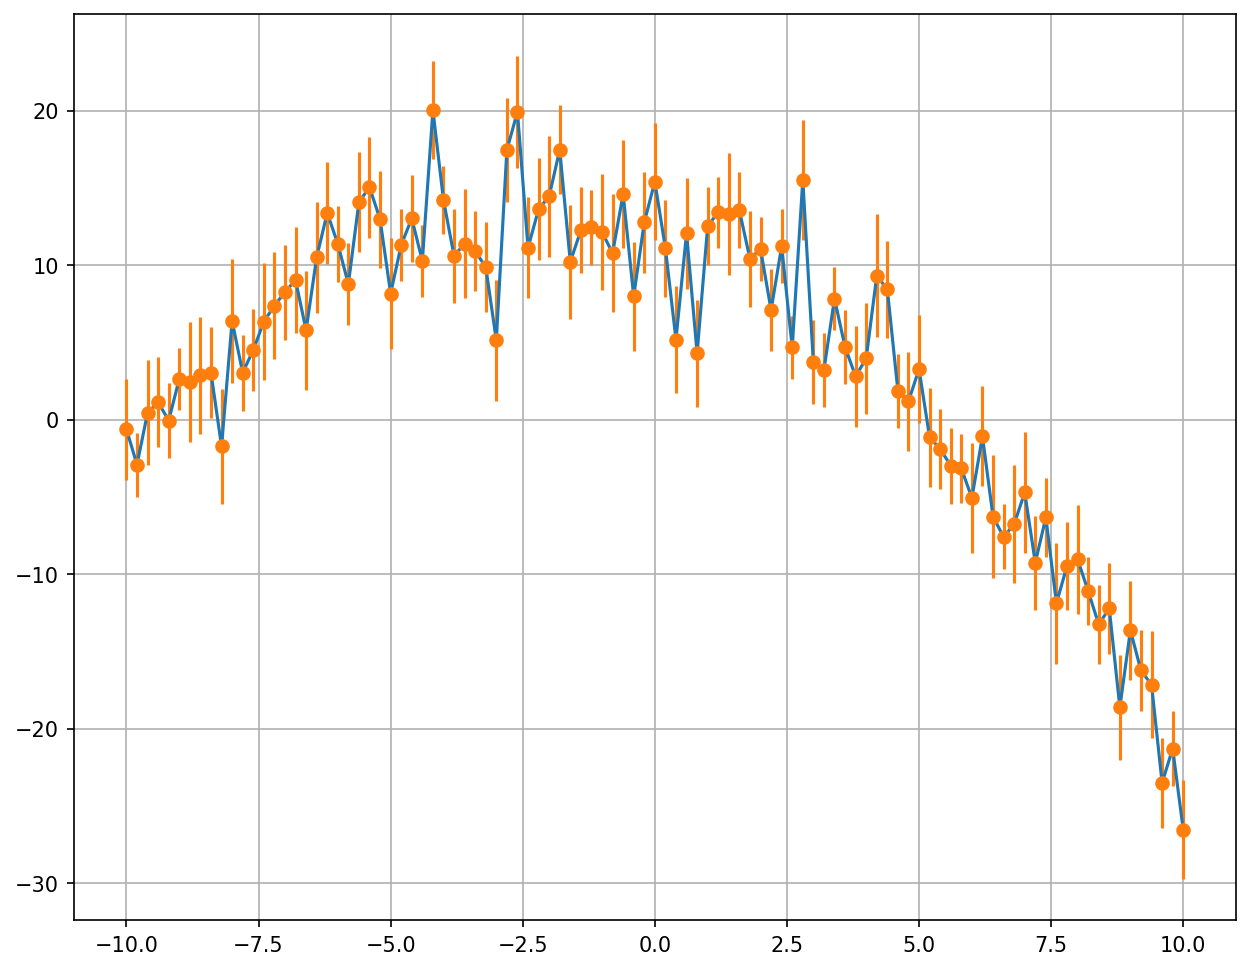

In [3]:
# ábra a mérési pontokkal és hibaintervallumokkal
plt.figure(figsize=(10, 8), dpi=150)

plt.grid()
plt.plot(x, y)

plt.errorbar(x,y,sigma,marker='o',linestyle='')

In [4]:
print(len(x), len(sigma))

x,sigma


101 101


(array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
         -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
         -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
         -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
         -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
         -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
          0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
          2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
          4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
          6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
          8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
          9.8,  10. ]),
 array([3.2843681 , 2.07522197, 3.40132167, 2.89689033, 2.41524286,
        2.00085381, 3.90104115, 3.80255237, 2.96583692, 3.72352568,
        3.99978075, 2.45792046, 2.66374723, 3.78406952, 3.4

In [5]:
# az illesztést elvégző program helye

%pylab inline

def myfit():
    
    b=matrix(zeros((len(x),1)))
    
    
        
        
    
    X=matrix(zeros((len(x),3)))
    #np.empty használata
    
    
    
    for i in range(len(x)):
        
        
            X[i,0]=(x[i]**2)/sigma[i]
            X[i, 1]=x[i]/sigma[i]
            X[i, 2]=1/sigma[i]
            
            b[i, 0]=y[i]/sigma[i]
            
    K = X.T*X
    
    L = X.T*b
    
    #Az egyenletrendszer most Kx=L alakban áll elő
    
    #print(numpy.shape(K))
    
    #print(numpy.shape(L))
    
    #print(X, X.T)
    
    a = solve(K,L)
        
    return a

Populating the interactive namespace from numpy and matplotlib


In [6]:
a = myfit() 

In [7]:
print(a[0,0],
a[1,0],
a[2,0])

-0.2478471935732298 -1.027591916078489 12.431709173116301


In [8]:
a 

matrix([[-0.24784719],
        [-1.02759192],
        [12.43170917]])

Amennyiben a mátrixot vektorosan akarom létrehozni, úgy a következő kód használható:

A függvény bemenete megadja, hogy hanyadfokú polinomot illesztünk.


In [9]:
def vektorosillesztes(k):
    
    #Amire illesztünk is paraméter kell, hogy legyen.
    hatvanyok = np.linspace(k, 0, k+1)
    
    xreshape = x.reshape(-1,1)  #Az x listát egy 1x1es formába rendezem.
    #Kommentekre figyelni
    
    sigmareshape = sigma.reshape(-1,1) #A hibákat egy 1x1es formába rendezem
    
    X = np.power(xreshape, hatvanyok)
    
    X = X/sigmareshape                    #Leosztok az egyes paraméterek hibáival.
    #print(hatvanyok, xreshape)
    #print(X)
    
    K = X.T@X
    L = X.T@(y/sigma)
    
    a = solve(K, L)
    
    return(a)

In [10]:
#vektorosillesztes(5)

In [11]:
vektorosillesztes(2)

array([-0.24784719, -1.02759192, 12.43170917])

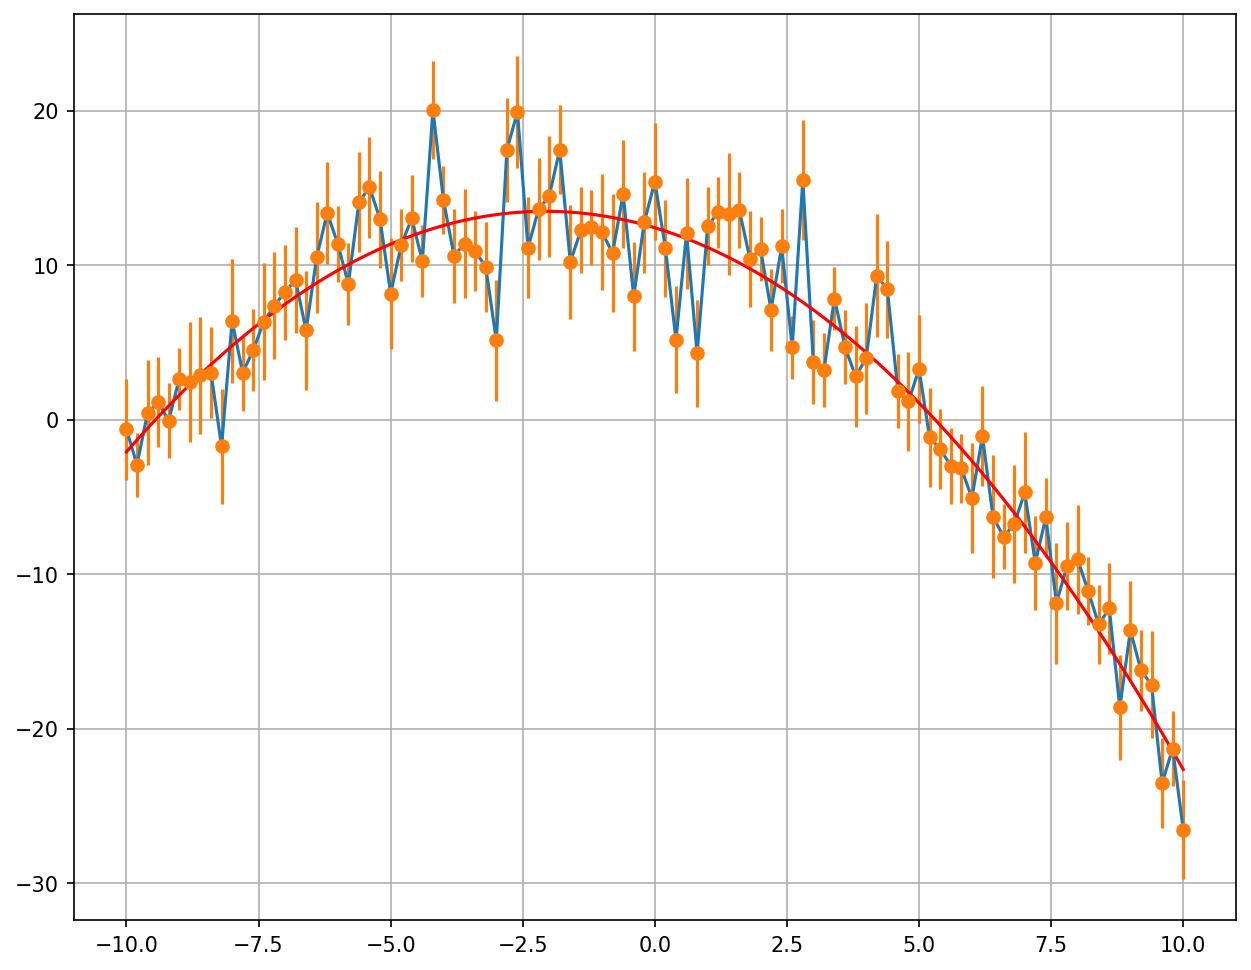

In [12]:
# ábra a másodfokú illesztéssel



plt.figure(figsize=(10, 8), dpi=150)

plt.grid()
plt.plot(x, y)

plt.errorbar(x,y,sigma,marker='o',linestyle='')

plt.plot(x, a[0,0]*x**2+a[1,0]*x+a[2,0], color="red")




## Alap 2. feladatrész

Írjuk függvényt, mely meghatározza az illesztett paraméterek aszimptotikus hibáját és kovarianciáját.

In [13]:
# a szórások és aszimptotikus hibák meghatározása


    
    
    
    
        
        
    
X=matrix(zeros((len(x),3)))
    
    
    
for i in range(len(x)):
        
    
        X[i,0]=(x[i]**2)/sigma[i]
        X[i, 1]=x[i]/sigma[i]
        X[i, 2]=1/sigma[i]
            
        
            
K = X.T*X



Kovarianciamatrix = inv(K)
    
print(numpy.shape(Kovarianciamatrix))

print("Az illeszkedési paraméterek hibái rendre:", np.sqrt(Kovarianciamatrix[0,0]), np.sqrt(Kovarianciamatrix[1,1]), np.sqrt(Kovarianciamatrix[2,2]))
    
print("Az első és a második paraméter kovarianciája:", Kovarianciamatrix[1,0]) 

print("Az első és a harmadik paraméter kovarianciája:", Kovarianciamatrix[0,1])

print("A második és a harmadik paraméter kovarianciája:", Kovarianciamatrix[1,2])
    

(3, 3)
Az illeszkedési paraméterek hibái rendre: 0.009410026758529696 0.04944717851051552 0.43548968035105573
Az első és a második paraméter kovarianciája: 1.7461365551089244e-05
Az első és a harmadik paraméter kovarianciája: 1.746136555108924e-05
A második és a harmadik paraméter kovarianciája: -0.0009555645572855792


Második lehetséges hibaszámítás (tetszőleges fokszámú polinomra):

In [14]:
def illesztesihibak(k):
    
    hatvanyok = np.linspace(k, 0, k+1)
    
    xreshape = x.reshape(-1,1)  #Az x listát egy 1x1es formába rendezem.
    
    sigmareshape = sigma.reshape(-1,1) #A hibákat egy 1x1es formába rendezem
    
    X = np.power(xreshape, hatvanyok)
    
    X = X/sigmareshape                    #Leosztok az egyes paraméterek hibáival.
    #print(hatvanyok, xreshape)
    #print(X)
    
    K = X.T@X
    #L = X.T@(y/sigma)
    
    Kovarianciamatrix = inv(K)
    
    for i in range(len(Kovarianciamatrix)):
        
        print("Az", i+1, " paraméter illesztési hibája", np.sqrt(Kovarianciamatrix[i, i]))
        
        
    if k ==2:
        
        print("Az első és a második paraméter kovarianciája:", Kovarianciamatrix[1,0]) 

        print("Az első és a harmadik paraméter kovarianciája:", Kovarianciamatrix[0,1])

        print("A második és a harmadik paraméter kovarianciája:", Kovarianciamatrix[1,2])
    
    return(Kovarianciamatrix)

In [15]:
illesztesihibak(2)

Az 1  paraméter illesztési hibája 0.009410026758529696
Az 2  paraméter illesztési hibája 0.04944717851051552
Az 3  paraméter illesztési hibája 0.43548968035105573
Az első és a második paraméter kovarianciája: 1.7461365551089244e-05
Az első és a harmadik paraméter kovarianciája: 1.746136555108924e-05
A második és a harmadik paraméter kovarianciája: -0.0009555645572855792


array([[ 8.85486036e-05,  1.74613656e-05, -3.05587287e-03],
       [ 1.74613656e-05,  2.44502346e-03, -9.55564557e-04],
       [-3.05587287e-03, -9.55564557e-04,  1.89651262e-01]])

In [16]:
illesztesihibak(5)

Az 1  paraméter illesztési hibája 7.226136926746291e-05
Az 2  paraméter illesztési hibája 0.00037142468158977017
Az 3  paraméter illesztési hibája 0.008369589181730282
Az 4  paraméter illesztési hibája 0.034507250223138684
Az 5  paraméter illesztési hibája 0.21347297459073364
Az 6  paraméter illesztési hibája 0.5603277648092263


array([[ 5.22170549e-09, -1.37317033e-09, -5.90501322e-07,
         1.82111107e-07,  1.26219958e-05, -3.77921603e-06],
       [-1.37317033e-09,  1.37956294e-07,  1.85840245e-07,
        -1.23272895e-05, -4.52610451e-06,  1.30111510e-04],
       [-5.90501322e-07,  1.85840245e-07,  7.00500231e-05,
        -2.33706381e-05, -1.63053228e-03,  4.93006250e-04],
       [ 1.82111107e-07, -1.23272895e-05, -2.33706381e-05,
         1.19075032e-03,  5.68454677e-04, -1.47110797e-02],
       [ 1.26219958e-05, -4.52610451e-06, -1.63053228e-03,
         5.68454677e-04,  4.55707109e-02, -1.35193354e-02],
       [-3.77921603e-06,  1.30111510e-04,  4.93006250e-04,
        -1.47110797e-02, -1.35193354e-02,  3.13967204e-01]])

Az előbbi hibaszámítás akkor is kicsi hibát ad, ha a szükségesnél kisebb fokszámú polinomot illesztünk, pl. a parabola mentén elhelyezkedő adatokra egyenest. Ezt felfoghatjuk úgy, hogy ez a módszer azt ondja meg, mekkokra szórása adódik az illesztett paramétereknek csupán a mérési adatok bizonytalanságából.
Viszont...
3a Jackknife, b bootstrap
4 red. khin^2 (n)
szorg.:
5 bootstrap konfidencia
6 validációs
7 többváltozós big nélkül

## Teljes 3. feladatrész
a) Határozzuk meg az illesztett parabola paramétereinek értékét és a paraméterértékek szórásnégyzetét a jacknife módszer segítségével!
Egymás után kiíratva a kovarianciamátrixból számolt és itt kapott eredményeket hasonlítsuk őket össze!

b) A bootstrap eljárás segítségével készítsünk 1000-2000 közötti számú új adathalmazt az eredeti adatokból és végezzük el mindegyikre a parabola illesztést!  A kapott illesztési paraméterek eloszlásáról készítsünk hisztogramot és ennek segítségével számítsuk ki a paraméterek várható értékét és szórásnégyzetét!
Bővítsük az a) pontbeli összehasonlítást az itt kapott eredményekkel!

c) Scatter ploton ábrázoljuk, hogy a boostrap módszer alapján hogyan oszlanak el és mennyire korrelálnak az egyes polinomegyütthatók egymással!

In [17]:
# jacknife módszer megvalósítása, paraméter értékek és szórásnégyzeteik számolása

In [18]:
for l in range(0,100):
    
    kihagyottxlista = [k for i,k in enumerate(x) if i!=l]   # [9, 8, 7, 5, 4, 3, 2, 1, 0]
    
    #print(kihagyottxlista)
    
    print()
    
    kihagyottylista = [k for i,k in enumerate(y) if i!=l]
    
    kihagyottsigma = [k for i,k in enumerate(sigma) if i!=l]
    
    #print(kihagyottylista)
    
    print()
    print()
    
    
    b=matrix(zeros((len(kihagyottylista),1)))
    
    
        
        
    
    X=matrix(zeros((len(kihagyottxlista),3)))
    
    
    
    for i in range(len(kihagyottxlista)):
        
        
            X[i, 0]=(kihagyottxlista[i]**2)/kihagyottsigma[i]
            X[i, 1]=kihagyottxlista[i]/kihagyottsigma[i]
            X[i, 2]=1/sigma[i]
            
            b[i, 0]=kihagyottylista[i]/kihagyottsigma[i]
            
    K = X.T@X
    
    L = X.T@b
    
    #print(K,L)
    #Az egyenletrendszer most Kx=L alakban áll elő
    
    #print(numpy.shape(K))
    
    #print(numpy.shape(L))
    
    #print(X, X.T)
    
    a = solve(K,L)
    
    print(a[0], a[1], a[2]) 




[[-0.21713757]] [[-1.02518834]] [[10.96716598]]



[[-0.2188013]] [[-1.01867205]] [[11.00580397]]



[[-0.22034707]] [[-1.01751863]] [[11.08636547]]



[[-0.22136465]] [[-1.01274599]] [[11.10430494]]



[[-0.22141645]] [[-1.01250824]] [[11.10535818]]



[[-0.22561904]] [[-0.99113669]] [[11.17150665]]



[[-0.22413005]] [[-1.01140222]] [[11.25772898]]



[[-0.22416132]] [[-1.01122673]] [[11.25805885]]



[[-0.22495903]] [[-1.00665639]] [[11.26891887]]



[[-0.22390814]] [[-1.0180949]] [[11.29693787]]



[[-0.22521864]] [[-1.00832721]] [[11.29829167]]



[[-0.22608824]] [[-1.00382108]] [[11.31736823]]



[[-0.22638754]] [[-1.0025087]] [[11.32445603]]



[[-0.22659384]] [[-1.00509624]] [[11.35552427]]



[[-0.22681818]] [[-1.00275358]] [[11.35260996]]



[[-0.22712349]] [[-0.99938678]] [[11.34821752]]



[[-0.22698876]] [[-1.00130997]] [[11.35327365]]



[[-0.22677533]] [[-1.00734757]] [[11.38010828]]



[[-0.22704303]] [[-1.00142306]] [[11.35843711]]



[[-0.2272331]] [[-0.996244]] [[

In [19]:
for l in range(99,100):
    
    kihagyottxlista = [k for i,k in enumerate(x) if i!=l]   # [9, 8, 7, 5, 4, 3, 2, 1, 0]
    
    #print(kihagyottxlista)
    
    print()
    
    kihagyottylista = [k for i,k in enumerate(y) if i!=l]
    
    #print(kihagyottylista)
    
    kihagyottsigma = [k for i,k in enumerate(sigma) if i!=l]
    
    print()
    print()
    
    
    b=matrix(zeros((len(kihagyottylista),1)))
    
    
        
        
    
    X=matrix(zeros((len(kihagyottxlista),3)))
    
    
    
    for i in range(len(kihagyottxlista)):
        
        
            X[i, 0]=(kihagyottxlista[i]**2)/kihagyottsigma[i]
            X[i, 1]=kihagyottxlista[i]/kihagyottsigma[i]
            X[i, 2]=1/sigma[i]
            
            b[i, 0]=kihagyottylista[i]/kihagyottsigma[i]
            
    K = X.T*X
    
    L = X.T*b
    
    #Az egyenletrendszer most Kx=L alakban áll elő
    
    #print(numpy.shape(K))
    
    #print(numpy.shape(L))
    
    #print(X, X.T)
    
    a = solve(K,L)
    
    print(a[0], a[1], a[2]) 




[[-0.24986863]] [[-1.03898757]] [[12.44461452]]


In [20]:
a0= []

a1 = []

a2 = []

for l in range(0,100):
    
    kihagyottxlista = [k for i,k in enumerate(x) if i!=l]   # [9, 8, 7, 5, 4, 3, 2, 1, 0]
    
    #print(kihagyottxlista)
    
    kihagyottylista = [k for i,k in enumerate(y) if i!=l]
    
    b=matrix(zeros((len(kihagyottylista),1)))
    
    
        
        
    
    X=matrix(zeros((len(kihagyottxlista),3)))
    
    
    
    for i in range(len(kihagyottxlista)):
        
        
            X[i, 0]=(x[i]**2)/sigma[i]
            X[i, 1]=x[i]/sigma[i]
            X[i, 2]=1/sigma[i]
            
            b[i, 0]=y[i]/sigma[i]
            
    K = X.T*X
    
    L = X.T*b
    
    #Az egyenletrendszer most Kx=L alakban áll elő
    
    #print(numpy.shape(K))
    
    #print(numpy.shape(L))
    
    #print(X, X.T)
    
    a = solve(K,L)
    
    a0.append(a[0])
    
    a1.append(a[1])
    
    a2.append(a[2])



In [21]:
print(sum(np.array(a0)))

print(sum(np.array(a1)))

print(sum(np.array(a2)))

-24.53879162419193
-101.72005052633438
1238.0045392145319


In [22]:
#A Jackknife módszerrel az illesztési paraméterek a következőnek adódtak:

print(sum(np.array(a0))/100)

print(sum(np.array(a1))/100)

print(sum(np.array(a2))/100)

-0.2453879162419193
-1.0172005052633437
12.380045392145318


In [23]:
# A jackknife módszer vektoros illesztés segítségével:

In [24]:
a0jackkinfe= []

a1jackknife = []

a2jackknife = []

hatvany = 2                                #Itt kell megadnom, hogy hanyadfokú polinomot illesztek.

for l in range(0,100):
    
    kihagyottxlista = np.array([k for i,k in enumerate(x) if i!=l])   
    
    #print(kihagyottxlista)
    
    kihagyottylista = np.array([k for i,k in enumerate(y) if i!=l])
    
    
    kihagyottsigma = np.array([k for i,k in enumerate(sigma) if i!=l])
        
        
    hatvanyok = np.array(np.linspace(hatvany, 0, hatvany+1))
    
    kihagyottxlistareshape = kihagyottxlista.reshape(-1,1)  #Az x listát egy 1x1es formába rendezem.
    
    kihagyottsigmareshape = kihagyottsigma.reshape(-1,1) #A hibákat egy 1x1es formába rendezem
    
    X = np.power(kihagyottxlistareshape, hatvanyok)
    
    X = X/kihagyottsigmareshape                    #Leosztok az egyes paraméterek hibáival.
    #print(hatvanyok, xreshape)
    #print(X)
    
    K = X.T@X
    L = X.T@(kihagyottylista/kihagyottsigma)
    
    a = solve(K, L)
    
    print(a)
    
    a0jackkinfe.append(a[0])
    
    a1jackknife.append(a[1])
    
    a2jackknife.append(a[2])
    
    

    
    

[-0.24866379 -1.0241568  12.4471544 ]
[-0.24554215 -1.03774285 12.39044543]
[-0.24829635 -1.02551599 12.43924233]
[-0.24840361 -1.02488536 12.44033588]
[-0.24707845 -1.03153999 12.42089079]
[-0.24902534 -1.02118063 12.44637111]
[-0.24789132 -1.02733641 12.432176  ]
[-0.24783392 -1.02767408 12.43159742]
[-0.24766071 -1.02883261 12.43061038]
[-0.24664372 -1.03625477 12.42821881]
[-0.24810036 -1.02560491 12.431533  ]
[-0.24696331 -1.0352277  12.43621282]
[-0.24744758 -1.03143646 12.4359432 ]
[-0.24783467 -1.0277281  12.43193034]
[-0.24789573 -1.02698363 12.43039592]
[-0.24794616 -1.02612418 12.42773592]
[-0.247934   -1.02600891 12.42653337]
[-0.2477246  -1.03051037 12.44293907]
[-0.2479064  -1.02554387 12.42260897]
[-0.24793838 -1.02171615 12.40199155]
[-0.24785516 -1.02318719 12.40663461]
[-0.24788014 -1.03027936 12.44877555]
[-0.24771102 -1.02249581 12.39586675]
[-0.24761407 -1.02199072 12.38833344]
[-0.24769937 -1.02499878 12.4097048 ]
[-0.2480787  -1.03076621 12.46110845]
[-0.24791825

In [25]:
print("A vektoros illesztéssel az x^2 együtthatókja:",sum(a0jackkinfe)/len(a0jackkinfe))

A vektoros illesztéssel az x^2 együtthatókja: -0.24786937515164642


In [26]:
print("A vektoros illesztéssel az x együtthatókja:",sum(a1jackknife)/len(a1jackknife))

A vektoros illesztéssel az x együtthatókja: -1.0277059240254551


In [27]:
print("A vektoros illesztéssel az x együtthatókja:",sum(a2jackknife)/len(a2jackknife))

A vektoros illesztéssel az x együtthatókja: 12.432174512106014


In [28]:
x = ndarray.tolist(x)

y = ndarray.tolist(y)

sigma = ndarray.tolist(sigma)

In [29]:
# a bootstrap módszer megvalósítása
# a várható értékek, szórások és kovarianciák meghatározása



from random import choices


Megoldasparameterek0 = []

Megoldasparameterek1 = []

Megoldasparameterek2 = []

for sorszam in range(0, 2000):

    randomxlista = choices(x, k=101,)





    randomylista = []

    randomsigma = []

    for i in randomxlista:
    
    
    
        #print(randomxlista.index(i), i, x[randomxlista.index(i)], x.index(i), y[x.index(i)])
    
        randomylista.append(y[x.index(i)])
    
        randomsigma.append(sigma[x.index(i)])
    


    
    
    b=matrix(zeros((len(randomylista),1)))
    
    
        
        
    
    X=matrix(zeros((len(randomxlista),3)))
    
    
    for i in range(len(randomxlista)):
        
        
        
        X[i,0]=(randomxlista[i]**2)/randomsigma[i]
        X[i, 1]=randomxlista[i]/randomsigma[i]
        X[i, 2]=1/randomsigma[i]
            
        b[i, 0]=y[i]/randomsigma[i]
            
    
    
    K = X.T@X
    
    L = X.T@b

    Megold = solve(K,L)

    Megold = Megold.tolist()
    
    Megoldasparameterek0.append(Megold[0])
    
    Megoldasparameterek1.append(Megold[1])
    
    Megoldasparameterek2.append(Megold[2])



        
        




In [1]:
[1,2,3,12,3].index(3)

2

In [30]:
#print(Megoldasparameterek0, Megoldasparameterek1, Megoldasparameterek2)

In [31]:
#plt.figure(figsize=(10, 8), dpi=150)

#plt.title("Az $x^2$ együtthatóinak hisztogramja")
#plt.grid()
#plt.hist(Megoldasparameterek0)
#plt.show()

In [32]:
Megoldasparameterek0 = list(np.concatenate(Megoldasparameterek0))

Megoldasparameterek1 = list(np.concatenate(Megoldasparameterek1))

Megoldasparameterek2 = list(np.concatenate(Megoldasparameterek2))
 


import matplotlib.pyplot as plt

Megoldasparameterek0_kerekitett = []

for i in Megoldasparameterek0:
    
    Megoldasparameterek0_kerekitett.append(np.round(i, 4))

    
Megoldasparameterek0_kerekitett

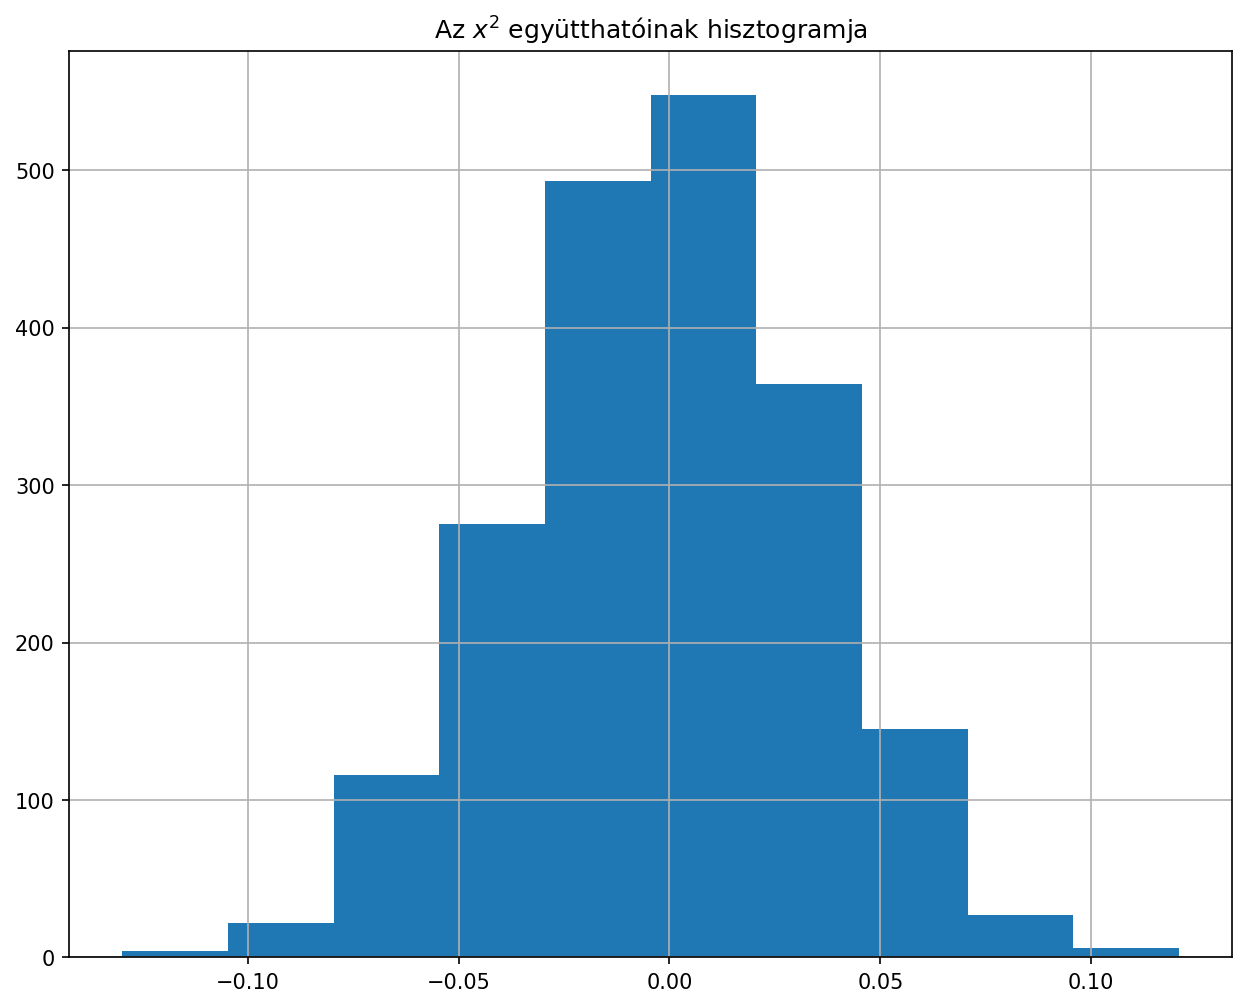

In [33]:
plt.figure(figsize=(10, 8), dpi=150)
plt.hist(Megoldasparameterek0)

plt.title("Az $x^2$ együtthatóinak hisztogramja")

plt.grid()

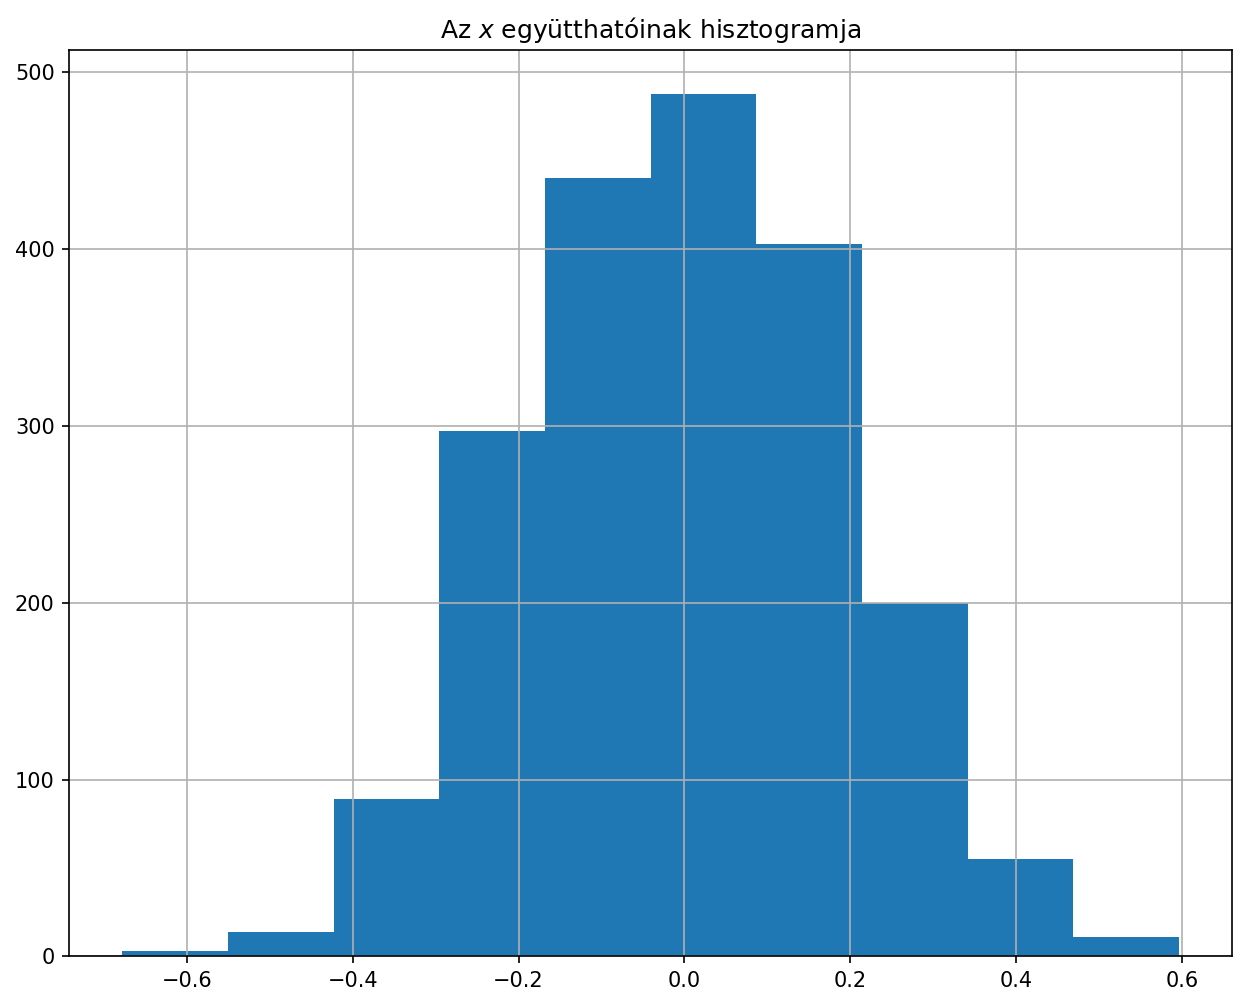

In [34]:
plt.figure(figsize=(10, 8), dpi=150)

plt.title("Az $x$ együtthatóinak hisztogramja")
plt.grid()
plt.hist(Megoldasparameterek1)
plt.show()

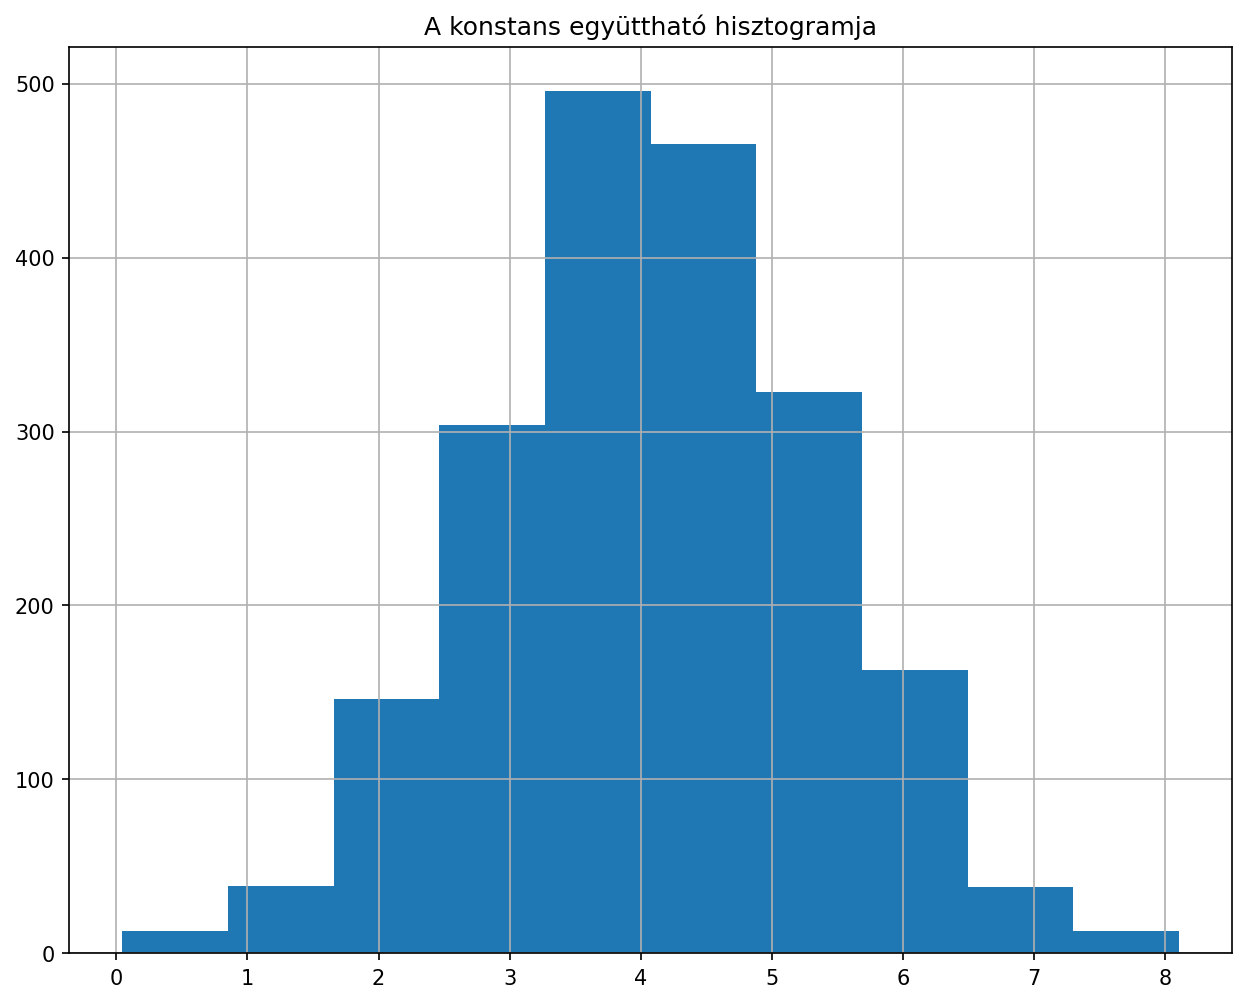

In [35]:
plt.figure(figsize=(10, 8), dpi=150)

plt.title("A konstans együttható hisztogramja")
plt.grid()
plt.hist(Megoldasparameterek2)
plt.show()

Várható értékek kiszámítása:

A kapott értékek kerekítés nélkül eltérnek egymástól, így a várható érték meg fog egyezni a számok összegével, osztva a lista hosszával.

In [36]:
print("Az x^2 együttható várható értéke:" ,np.mean(Megoldasparameterek0)) 

Az x^2 együttható várható értéke: -0.0012707271133580672


In [37]:
np.mean(Megoldasparameterek1) 

-9.893587681363392e-05

In [38]:
np.mean(Megoldasparameterek2) 

4.09661144825764

A szórásnégyzetek kiszámításánál a következő képletet alkalmaztam:

$$S^2 = \frac{ \sum (x_i- \bar x )^2}{n-1}$$

In [39]:
#A szórásnégyzetek kiszámítása:

szoras0 = []

for i in Megoldasparameterek0:
    
    negyzetosszeg = (i-np.mean(Megoldasparameterek0))**2
    
    szoras0.append(negyzetosszeg)
    
szorasnegyzet = sum(szoras0)

print("Az x^2 együtthatóinak szórásnégyzete:", szorasnegyzet/(len(Megoldasparameterek0)-1))
    
    


Az x^2 együtthatóinak szórásnégyzete: 0.0012455406062576164


In [40]:
szoras1 = []

for i in Megoldasparameterek1:
    
    negyzetosszeg = (i-np.mean(Megoldasparameterek1))**2
    
    szoras1.append(negyzetosszeg)
    
szorasnegyzet = sum(szoras1)

print("Az x együtthatóinak szórásnégyzete:", szorasnegyzet/(len(Megoldasparameterek1)-1))

Az x együtthatóinak szórásnégyzete: 0.03524165290985068


In [41]:
szoras2 = []

for i in Megoldasparameterek2:
    
    negyzetosszeg = (i-np.mean(Megoldasparameterek2))**2
    
    szoras2.append(negyzetosszeg)
    
szorasnegyzet = sum(szoras2)

print("Az x együtthatóinak szórásnégyzete:", szorasnegyzet/(len(Megoldasparameterek2)-1))

Az x együtthatóinak szórásnégyzete: 1.5990301528114217


In [42]:
#randomxlista

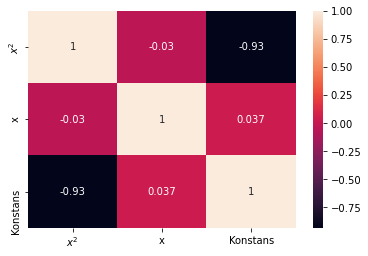

In [43]:
# scatter plots


#Az ábrán az illesztett adatsorok korrelációját ábrázoltam.
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'$x^2$': Megoldasparameterek0,
        'x': Megoldasparameterek1,
        'Konstans': Megoldasparameterek2
        }

df = pd.DataFrame(data)

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

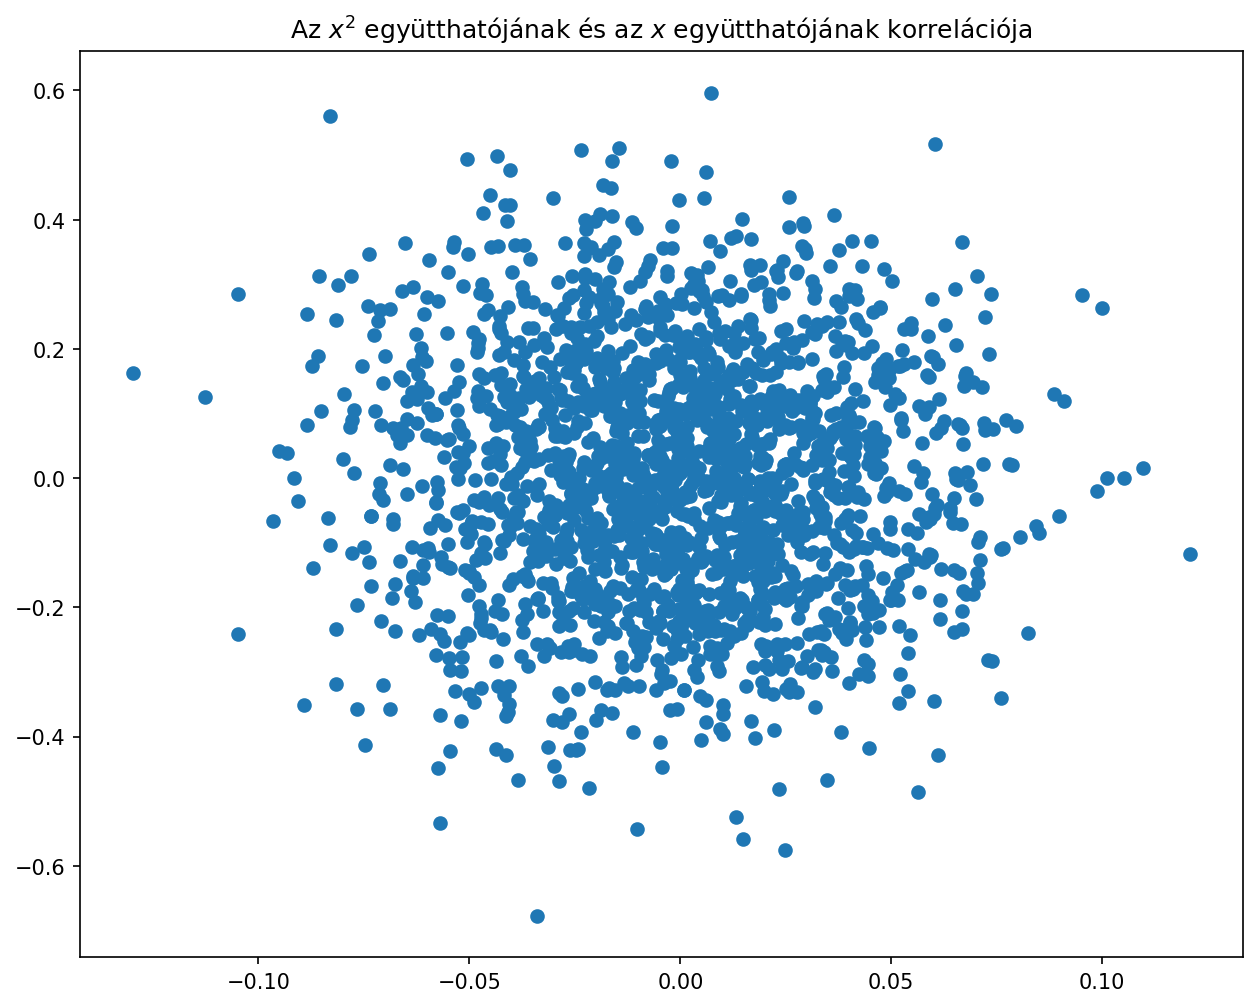

In [44]:
plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(Megoldasparameterek0, Megoldasparameterek1)
plt.title('Az $x^2$ együtthatójának és az $x$ együtthatójának korrelációja')

plt.show()

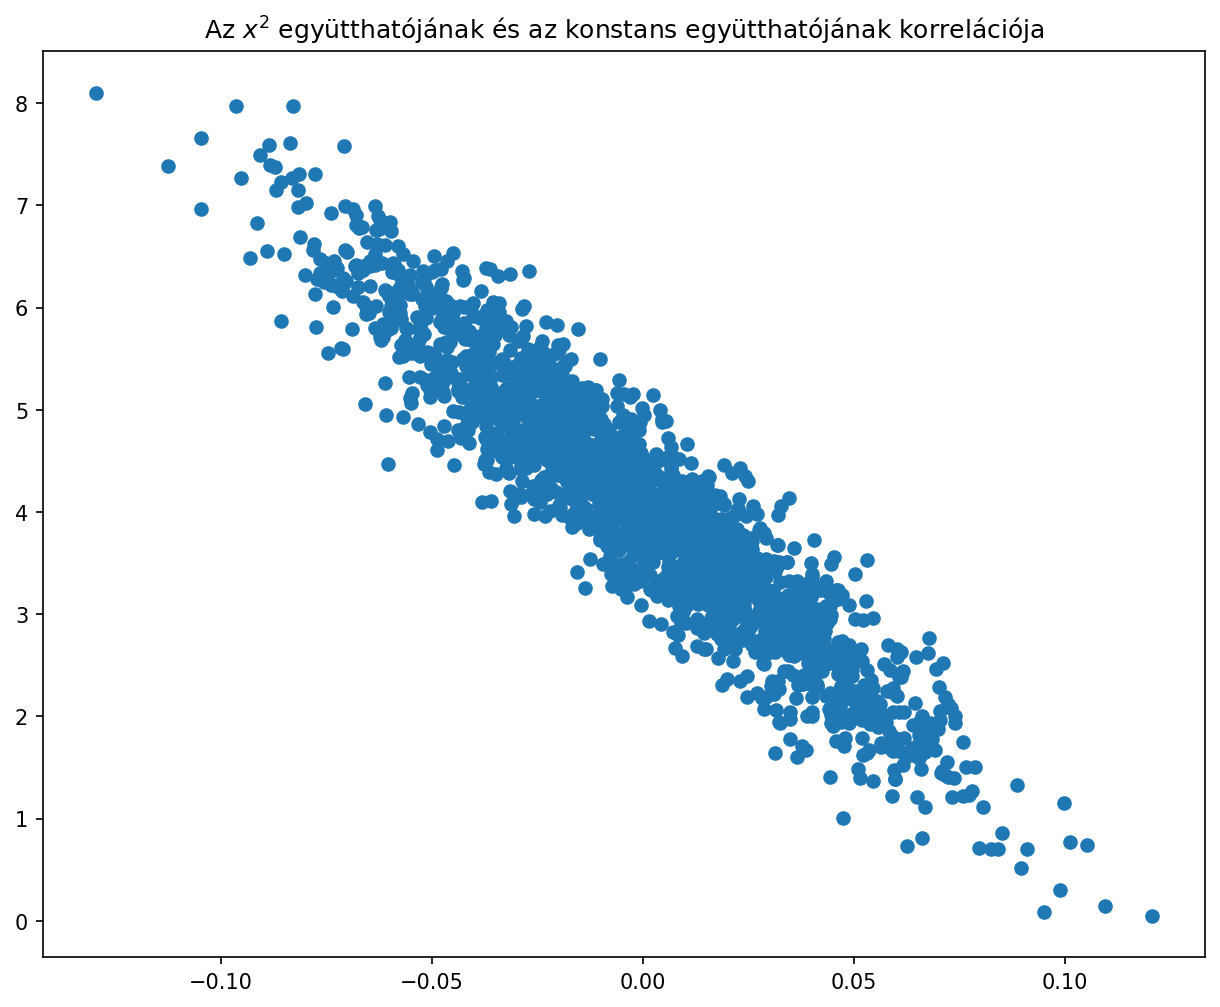

In [45]:

plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(Megoldasparameterek0, Megoldasparameterek2)

plt.title('Az $x^2$ együtthatójának és az konstans együtthatójának korrelációja')
plt.show()

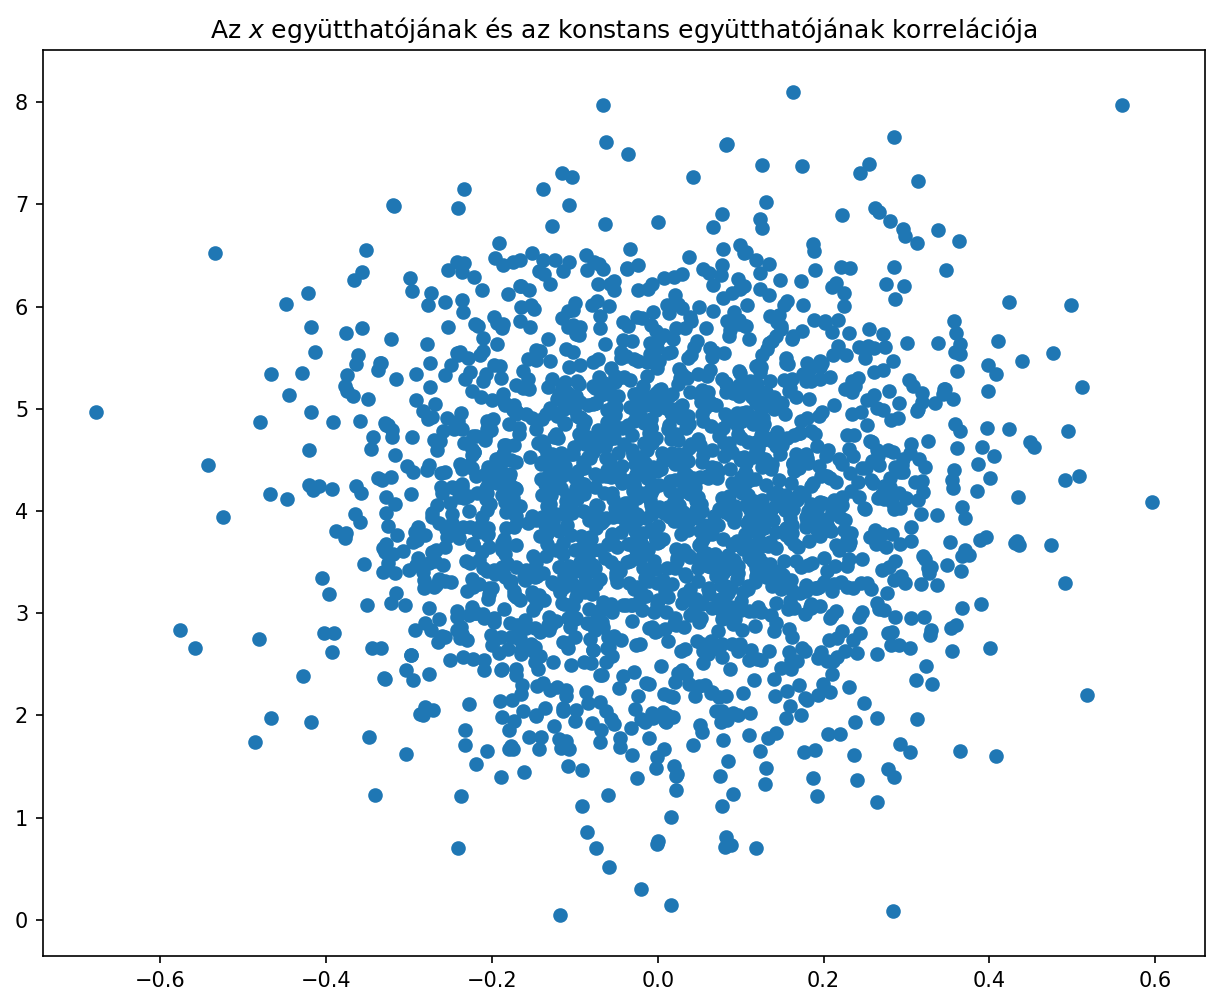

In [46]:

plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(Megoldasparameterek1, Megoldasparameterek2)
plt.title('Az $x$ együtthatójának és az konstans együtthatójának korrelációja')
plt.show()

In [47]:
# A bootstrap módszer megvalósítása vektoros illesztéssel:

In [48]:
from random import choices

k = 2 #Itt adhatom meg hanyadik hatvanyra szeretném elvégezni az illesztést.


Megoldasparameterek0 = []

Megoldasparameterek1 = []

Megoldasparameterek2 = []

for sorszam in range(0, 2000):

    randomxlista = choices(x, k=101,)





    randomylista = []

    randomsigma = []

    for i in randomxlista:
    
    
    
        #print(randomxlista.index(i), i, x[randomxlista.index(i)], x.index(i), y[x.index(i)])
    
        randomylista.append(y[x.index(i)])
    
        randomsigma.append(sigma[x.index(i)])
        
        
        
    hatvanyok = np.linspace(k, 0, k+1)
    
    randomxreshape = np.array(randomxlista).reshape(-1,1)  #Az x listát egy 1x1es formába rendezem.
    
    randomsigmareshape = np.array(randomsigma).reshape(-1,1) #A hibákat egy 1x1es formába rendezem
    
    X = np.power(randomxreshape, hatvanyok)
    
    X = X/randomsigmareshape                    #Leosztok az egyes paraméterek hibáival.
    #print(hatvanyok, xreshape)
    #print(X)
    
    K = X.T@X
    L = X.T@(np.array(randomylista)/randomsigma)
    
    a = solve(K, L)
    
    
    print(a)

    
    Megoldasparameterek0.append(a[0])
    
    Megoldasparameterek1.append(a[1])
    
    Megoldasparameterek2.append(a[2])




[-0.23647193 -1.0492073  12.11189855]
[-0.24902886 -1.09114445 12.64469977]
[-0.24412414 -1.08176995 12.26667951]
[-0.25532007 -1.02620986 12.61363355]
[-0.22720448 -1.03165968 11.63673391]
[-0.26167789 -1.10201804 12.87820024]
[-0.25591016 -1.00143083 12.85592241]
[-0.25094426 -1.06623589 12.35043959]
[-0.24879953 -1.0676183  12.76128371]
[-0.23546028 -1.00639819 12.21688148]
[-0.24597529 -0.97297292 12.1838445 ]
[-0.25251222 -0.99562631 12.66787204]
[-0.26577519 -1.06374328 13.42411224]
[-0.25207122 -0.99596899 12.83359327]
[-0.25176976 -0.97199959 13.11134654]
[-0.2518586  -1.0776223  12.74186402]
[-0.25319189 -1.01708614 13.01116082]
[-0.24415774 -1.00631306 12.74661766]
[-0.25410962 -1.01969736 12.62396448]
[-0.23162132 -0.98868285 12.05038318]
[-0.25870479 -1.01211621 13.17732057]
[-0.25164901 -1.08239425 12.7178496 ]
[-0.25090365 -1.03145095 12.75882171]
[-0.24755949 -1.04854839 12.61728181]
[-0.25811003 -1.03276698 12.88434594]
[-0.2568308  -1.09614934 12.74441932]
[-0.24561376

[-0.26247341 -1.04208255 12.83773375]
[-0.2651118  -1.02027774 13.19500916]
[-0.23759609 -0.99527471 11.83129193]
[-0.24832914 -1.06577139 12.2148188 ]
[-0.2426086  -1.02738719 11.9412219 ]
[-0.25415369 -1.06455396 12.6522027 ]
[-0.24289763 -1.03431302 12.43049381]
[-0.25159881 -1.06090633 12.54334262]
[-0.25701383 -1.02752356 13.10189083]
[-0.25285099 -1.04729399 12.16938242]
[-0.26159032 -1.08508135 13.29154847]
[-0.261733   -0.99369959 13.03712549]
[-0.25844241 -1.09439514 12.77684241]
[-0.24233371 -1.0190981  11.97238375]
[-0.24708793 -1.03982378 12.51775598]
[-0.22744325 -1.04515813 11.87320547]
[-0.25267263 -0.95630115 12.26069936]
[-0.26359225 -1.0936517  12.98720612]
[-0.2544071  -0.99122044 12.67035933]
[-0.26881513 -1.04464696 13.03207153]
[-0.25279566 -0.99989465 12.25261439]
[-0.2356937  -1.01732412 11.68419567]
[-0.25604756 -1.00753912 13.10024305]
[-0.25343803 -1.0298486  12.22495178]
[-0.25801109 -0.98496346 12.98903363]
[-0.25496527 -1.04704918 12.63024462]
[-0.26656078

[-0.24292102 -1.02779848 11.98201306]
[-0.24605951 -1.01039414 12.29001687]
[-0.2373774  -0.96614482 12.23584715]
[-0.2474019  -1.03988226 11.84732933]
[-0.25292204 -1.04497432 12.59465908]
[-0.25057862 -1.02166272 12.97889576]
[-0.2439041  -1.03358196 12.13130222]
[-0.25570026 -1.04304264 12.57856162]
[-0.24592243 -0.97921243 12.66762952]
[-0.25088061 -1.07644453 12.79136398]
[-0.23555136 -0.9714011  11.97181459]
[-0.24243693 -0.97469697 12.27565842]
[-0.24677034 -1.03766883 12.66403046]
[-0.25147752 -1.04739117 12.75013287]
[-0.23796219 -1.07601811 12.18011821]
[-0.25776749 -1.01769247 13.09807589]
[-0.24301302 -0.97563806 12.63643639]
[-0.24307376 -1.13032637 12.04881405]
[-0.23572336 -1.0140575  11.63926675]
[-0.23413323 -0.97749082 11.86749216]
[-0.24216026 -1.09524099 12.71482846]
[-0.23965422 -1.00687177 12.0414802 ]
[-0.25433385 -0.96853036 12.70843304]
[-0.24456026 -1.04380839 12.32370131]
[-0.24605676 -1.02561932 12.32959233]
[-0.25843614 -1.04994264 12.96363029]
[-0.24349792

[-0.24698412 -1.05814147 11.98802445]
[-0.24171999 -0.99630409 11.75932925]
[-0.23993425 -1.04353656 11.77913601]
[-0.25003004 -1.07569634 12.4498971 ]
[-0.26489508 -1.04787921 13.58769963]
[-0.25233687 -1.03971918 12.48272995]
[-0.23349657 -1.04154263 11.60642347]
[-0.24743344 -1.08548552 12.27789767]
[-0.24635994 -0.97676242 12.33412157]
[-0.24799472 -0.99347981 12.72985491]
[-0.23848023 -0.97102235 11.74159159]
[-0.24258995 -0.97715469 12.27060667]
[-0.23767774 -1.04259692 11.59834802]
[-0.25529372 -1.10882795 12.63711311]
[-0.23253303 -1.01046326 11.80157448]
[-0.26172846 -1.06589112 13.31405361]
[-0.24305377 -1.04538261 12.13239918]
[-0.24465591 -0.99239344 12.03761572]
[-0.25675309 -0.96598411 12.95049972]
[-0.24521437 -1.03452548 11.90121574]
[-0.2393822  -0.98790438 11.89142344]
[-0.23475413 -0.98451938 11.75098955]
[-0.23527063 -1.01411959 11.96393276]
[-0.25127946 -0.99452204 12.67843783]
[-0.23885971 -1.04081505 12.35494457]
[-0.23670172 -1.07701402 11.86790318]
[-0.26021049

[-0.24821336 -0.98011229 12.23809261]
[-0.24477187 -1.10199023 12.36193047]
[-0.23710281 -1.07635876 12.11565537]
[-0.25079227 -1.00288071 12.66798479]
[-0.25090701 -1.05805431 12.45567909]
[-0.2344785  -0.98254354 11.80216707]
[-0.24707305 -1.01703021 12.52865381]
[-0.2431507  -1.03801404 12.57863457]
[-0.2514648  -1.07194023 12.73165104]
[-0.24561012 -1.03356474 12.56039323]
[-0.25102598 -1.00253603 12.05476771]
[-0.23877572 -1.04239291 12.03082762]
[-0.25171659 -1.02520104 12.68142646]
[-0.25203338 -1.02665262 12.47172613]
[-0.22996419 -1.02618388 11.75500182]
[-0.25459289 -0.99510667 13.04136333]
[-0.25302091 -0.9973256  12.94256279]
[-0.24278109 -1.02914385 12.15832037]
[-0.26108536 -1.08674496 13.34861392]
[-0.24725318 -0.99874844 12.22983852]
[-0.25045607 -1.00542772 12.79053712]
[-0.24676584 -0.99824796 12.24842209]
[-0.24849195 -1.01717012 12.31649505]
[-0.23857186 -0.98267676 12.11871469]
[-0.25932268 -1.0456867  12.65168939]
[-0.24097408 -1.04608525 12.54493674]
[-0.25369036

[-0.25389299 -0.97668298 12.71023271]
[-0.25007851 -0.99765131 11.95878032]
[-0.24802907 -1.04036259 12.39359712]
[-0.23730423 -1.01936789 12.08988933]
[-0.23805346 -1.00368381 12.02729827]
[-0.25141676 -1.03098664 12.43567379]
[-0.23868479 -1.07272627 11.65430931]
[-0.24592611 -1.03446924 12.56162527]
[-0.25222124 -1.07833699 12.5594894 ]
[-0.25102907 -0.99796725 12.32318204]
[-0.25635146 -1.01012612 12.70098727]
[-0.24132636 -0.96654121 11.95202544]
[-0.24013504 -1.04863357 11.5119106 ]
[-0.25117158 -1.02021314 12.56694043]
[-0.24602477 -1.00324884 12.36693523]
[-0.25744924 -1.083064   13.38931477]
[-0.23215363 -0.99756361 12.114689  ]
[-0.24561033 -1.02904596 11.99740081]
[-0.25504462 -1.00633922 12.80116193]
[-0.24396184 -1.06370547 12.35141708]
[-0.24402503 -0.98572693 11.94111009]
[-0.24766108 -1.05428858 12.0498619 ]
[-0.25806589 -1.03231527 13.06037036]
[-0.24877941 -1.0006097  12.54765655]
[-0.25222114 -1.02139428 12.41832969]
[-0.24304774 -1.00023392 12.24614604]
[-0.2455142 

[-0.23441296 -0.96408575 11.33317829]
[-0.25218132 -1.02411795 12.78643048]
[-0.24612374 -0.94885859 11.95482377]
[-0.23950427 -1.02886069 11.48145059]
[-0.25929397 -1.06227569 13.13019157]
[-0.24116759 -0.96234772 12.27243899]
[-0.23830585 -0.95841172 11.84340143]
[-0.24425244 -0.94299206 12.40786157]
[-0.23277548 -1.00347026 11.61441966]
[-0.25112562 -1.03626933 12.55418394]
[-0.23113033 -1.05947381 11.97387282]
[-0.25514217 -1.01265784 12.89545857]
[-0.25167518 -1.10298423 12.55489664]
[-0.23973837 -1.02985985 12.20901046]
[-0.23820594 -1.05663232 12.10606731]
[-0.22936295 -0.95414143 11.312572  ]
[-0.25927224 -1.02996774 13.04281708]
[-0.25760317 -1.09701809 12.64855064]
[-0.23702057 -0.96268268 12.23807911]
[-0.25335555 -1.02240758 12.46005805]
[-0.26052219 -0.98641779 13.26471193]
[-0.23992361 -1.04449062 12.04255351]
[-0.25437582 -1.08573268 12.94514391]
[-0.25054783 -1.00218624 12.59541526]
[-0.24683214 -1.10464541 12.0942639 ]
[-0.24889638 -1.00812689 12.196765  ]
[-0.26203022

[-0.24425869 -0.95844076 12.47734015]
[-0.25233703 -0.97891992 12.62873022]
[-0.24718599 -1.06069492 12.38655121]
[-0.23877357 -0.98479638 12.26677174]
[-0.24731257 -0.96495575 12.37166168]
[-0.25448045 -1.03987411 12.77097356]
[-0.24589558 -1.08273928 12.31000917]
[-0.25657069 -0.99501251 12.96294703]
[-0.23901999 -0.9988197  12.51210739]
[-0.24919249 -1.04344383 12.56378708]
[-0.24830629 -1.06292159 12.59816644]
[-0.24488348 -1.14916729 12.15426503]
[-0.23599505 -1.01018608 11.93501554]
[-0.24745632 -1.05668205 12.02159436]
[-0.2516911  -1.06933481 12.45684984]
[-0.23345018 -1.03590115 12.19901084]
[-0.24144196 -1.03942711 11.9872904 ]
[-0.25386207 -1.00669617 12.69200398]
[-0.2378232  -1.06669621 12.06738766]
[-0.25183835 -0.99352    12.73047463]
[-0.25021294 -0.96680375 12.34964901]
[-0.25042215 -1.02478217 12.95473302]
[-0.25567367 -1.01786068 12.73023262]
[-0.24814605 -1.01116501 12.47783828]
[-0.24381935 -1.04299143 12.27495605]
[-0.25215457 -0.98514139 12.4226291 ]
[-0.2549684 

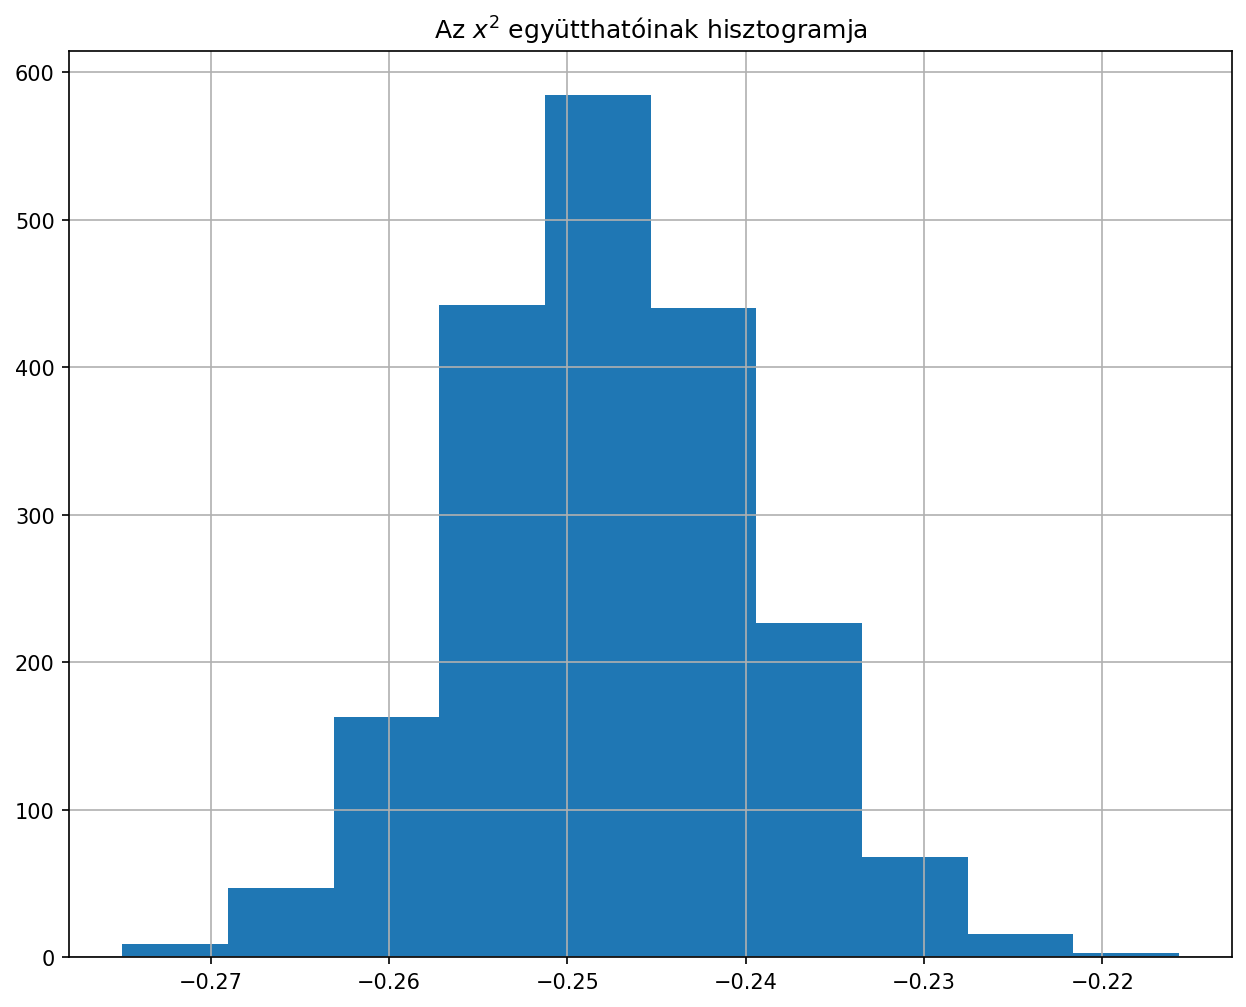

In [49]:
plt.figure(figsize=(10, 8), dpi=150)

plt.title("Az $x^2$ együtthatóinak hisztogramja")
plt.grid()
plt.hist(Megoldasparameterek0)
plt.show()

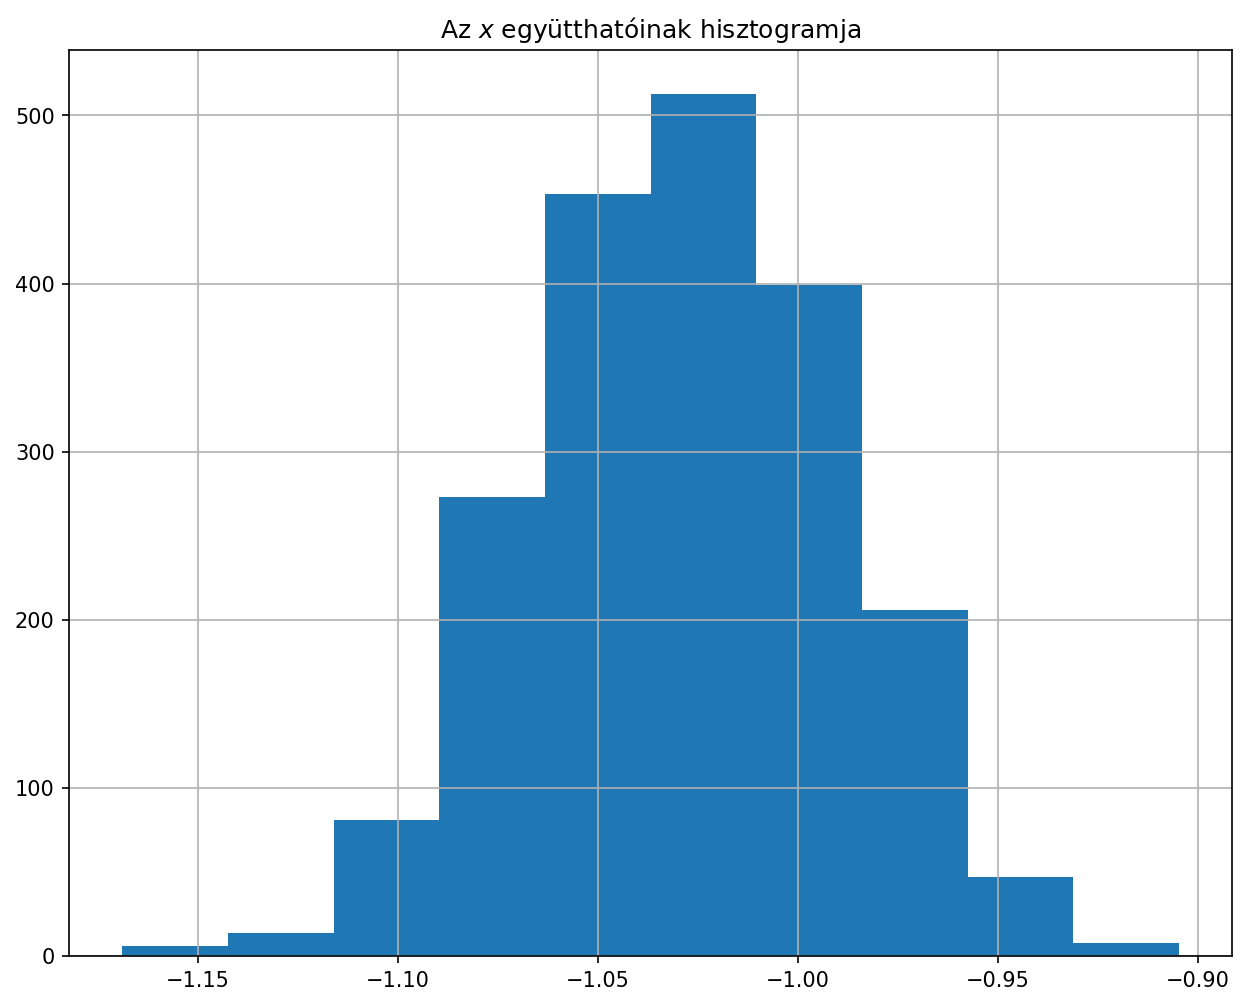

In [50]:
plt.figure(figsize=(10, 8), dpi=150)

plt.title("Az $x$ együtthatóinak hisztogramja")
plt.grid()
plt.hist(Megoldasparameterek1)
plt.show()

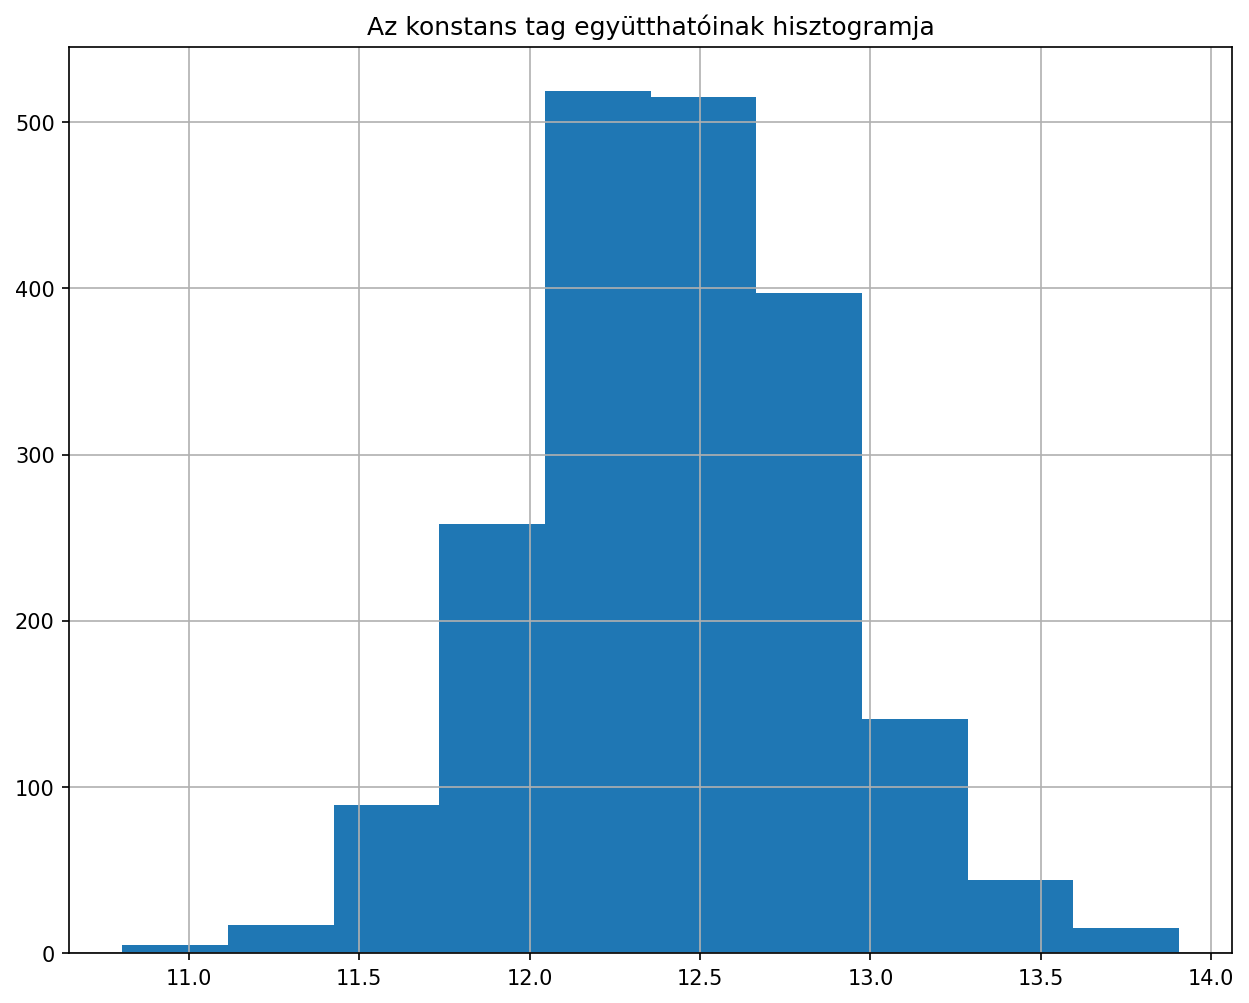

In [51]:
plt.figure(figsize=(10, 8), dpi=150)

plt.title("Az konstans tag együtthatóinak hisztogramja")
plt.grid()
plt.hist(Megoldasparameterek2)
plt.show()

In [52]:
#A szórások és a várható értékek számítása:

In [53]:
#A szórásnégyzetek kiszámítása:

szoras0 = []

for i in Megoldasparameterek0:
    
    negyzetosszeg = (i-np.mean(Megoldasparameterek0))**2
    
    szoras0.append(negyzetosszeg)
    
szorasnegyzet = sum(szoras0)

print("Az x^2 együtthatóinak szórásnégyzete:", szorasnegyzet/(len(Megoldasparameterek0)-1))

Az x^2 együtthatóinak szórásnégyzete: 6.65024027352358e-05


In [54]:
szoras1 = []

for i in Megoldasparameterek1:
    
    negyzetosszeg = (i-np.mean(Megoldasparameterek1))**2
    
    szoras1.append(negyzetosszeg)
    
szorasnegyzet = sum(szoras1)

print("Az x együtthatóinak szórásnégyzete:", szorasnegyzet/(len(Megoldasparameterek1)-1))

Az x együtthatóinak szórásnégyzete: 0.0014636152986224561


In [55]:
szoras2 = []

for i in Megoldasparameterek2:
    
    negyzetosszeg = (i-np.mean(Megoldasparameterek2))**2
    
    szoras2.append(negyzetosszeg)
    
szorasnegyzet = sum(szoras2)

print("Az x együtthatóinak szórásnégyzete:", szorasnegyzet/(len(Megoldasparameterek2)-1))

Az x együtthatóinak szórásnégyzete: 0.19425969318653244


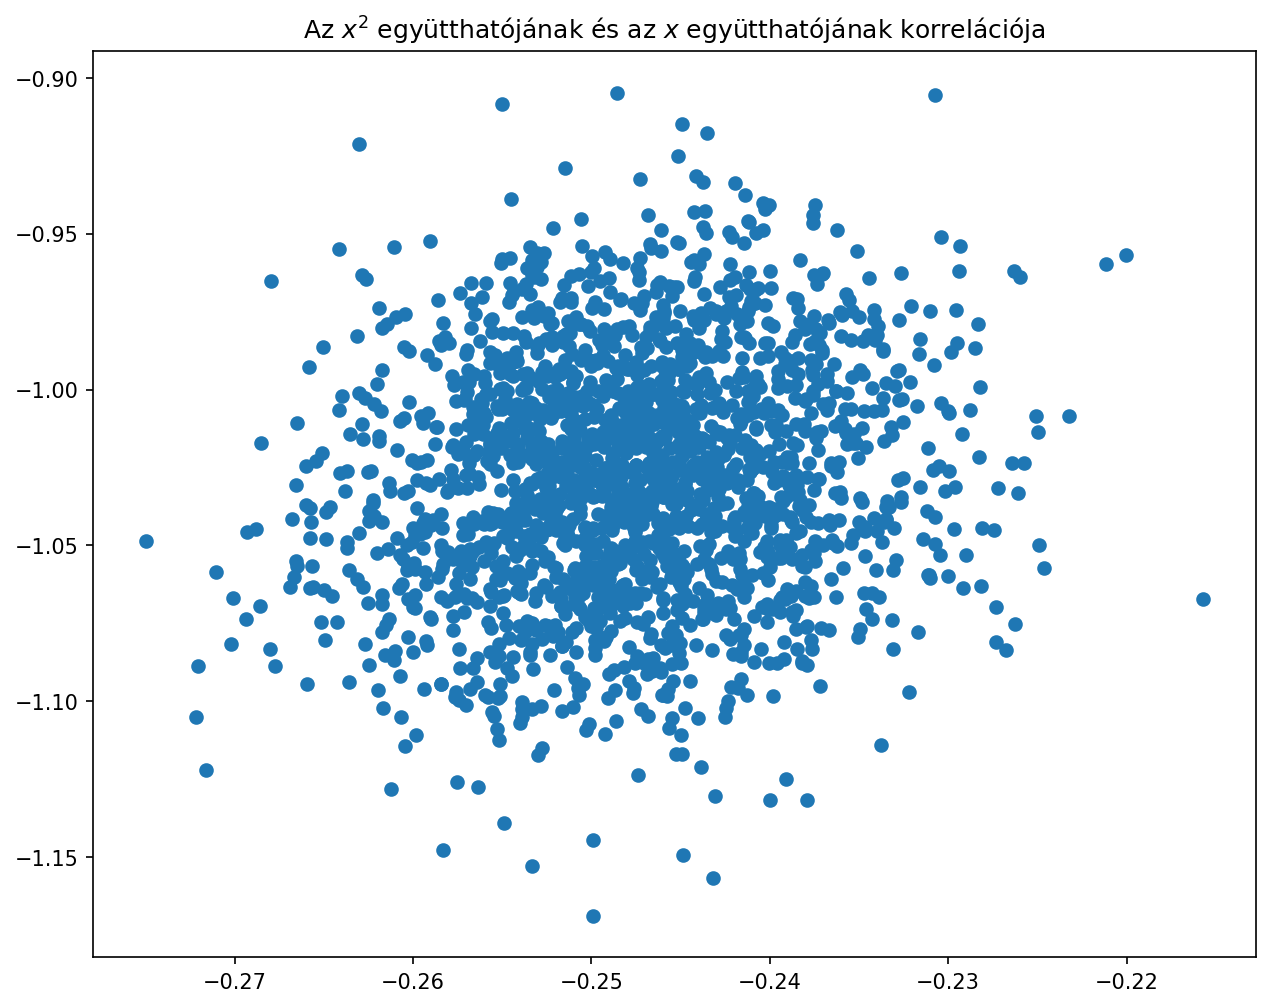

In [56]:
plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(Megoldasparameterek0, Megoldasparameterek1)
plt.title('Az $x^2$ együtthatójának és az $x$ együtthatójának korrelációja')

plt.show()

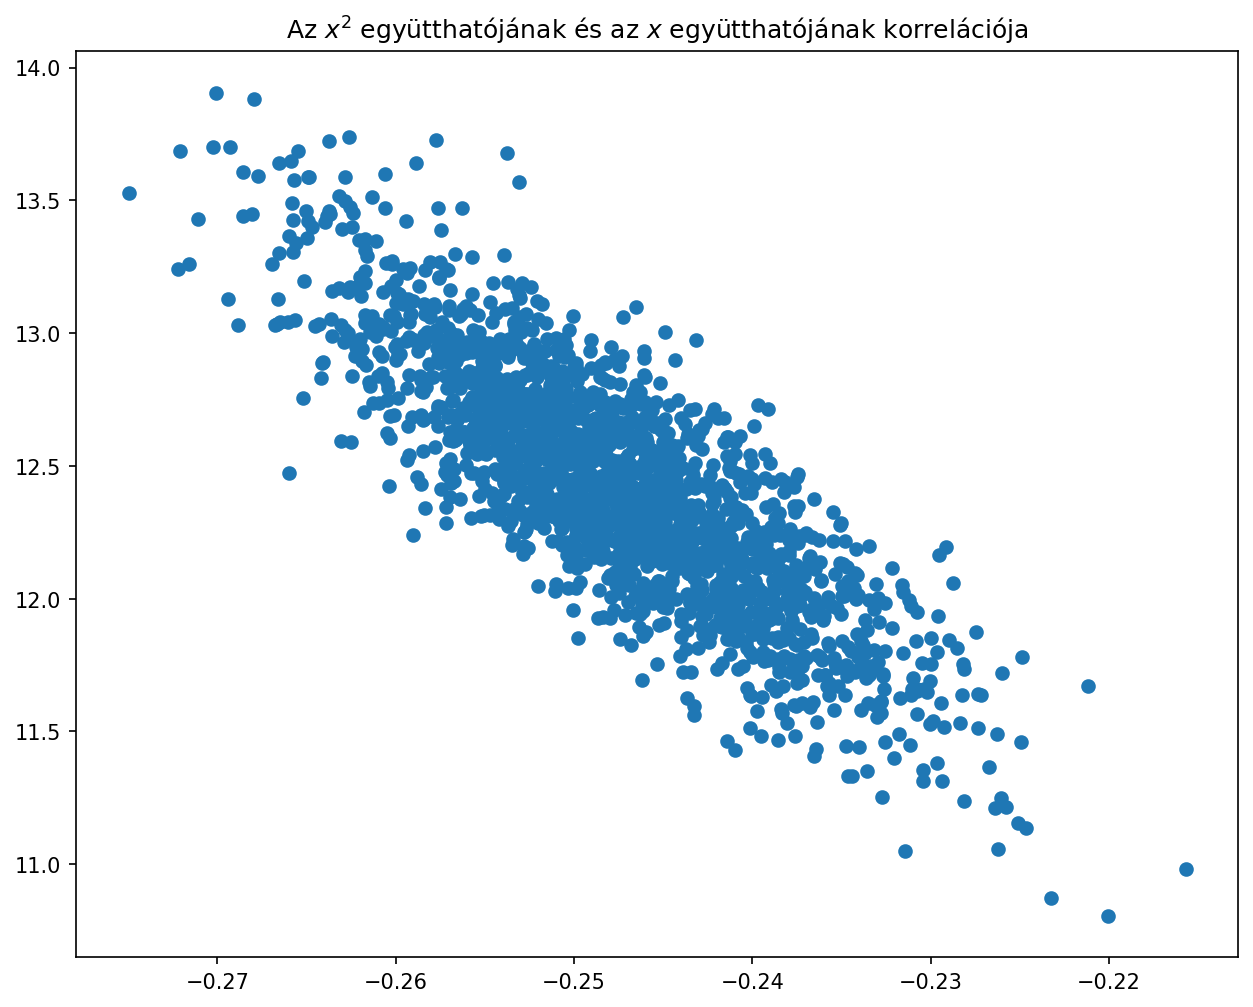

In [57]:
plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(Megoldasparameterek0, Megoldasparameterek2)
plt.title('Az $x^2$ együtthatójának és az $x$ együtthatójának korrelációja')

plt.show()

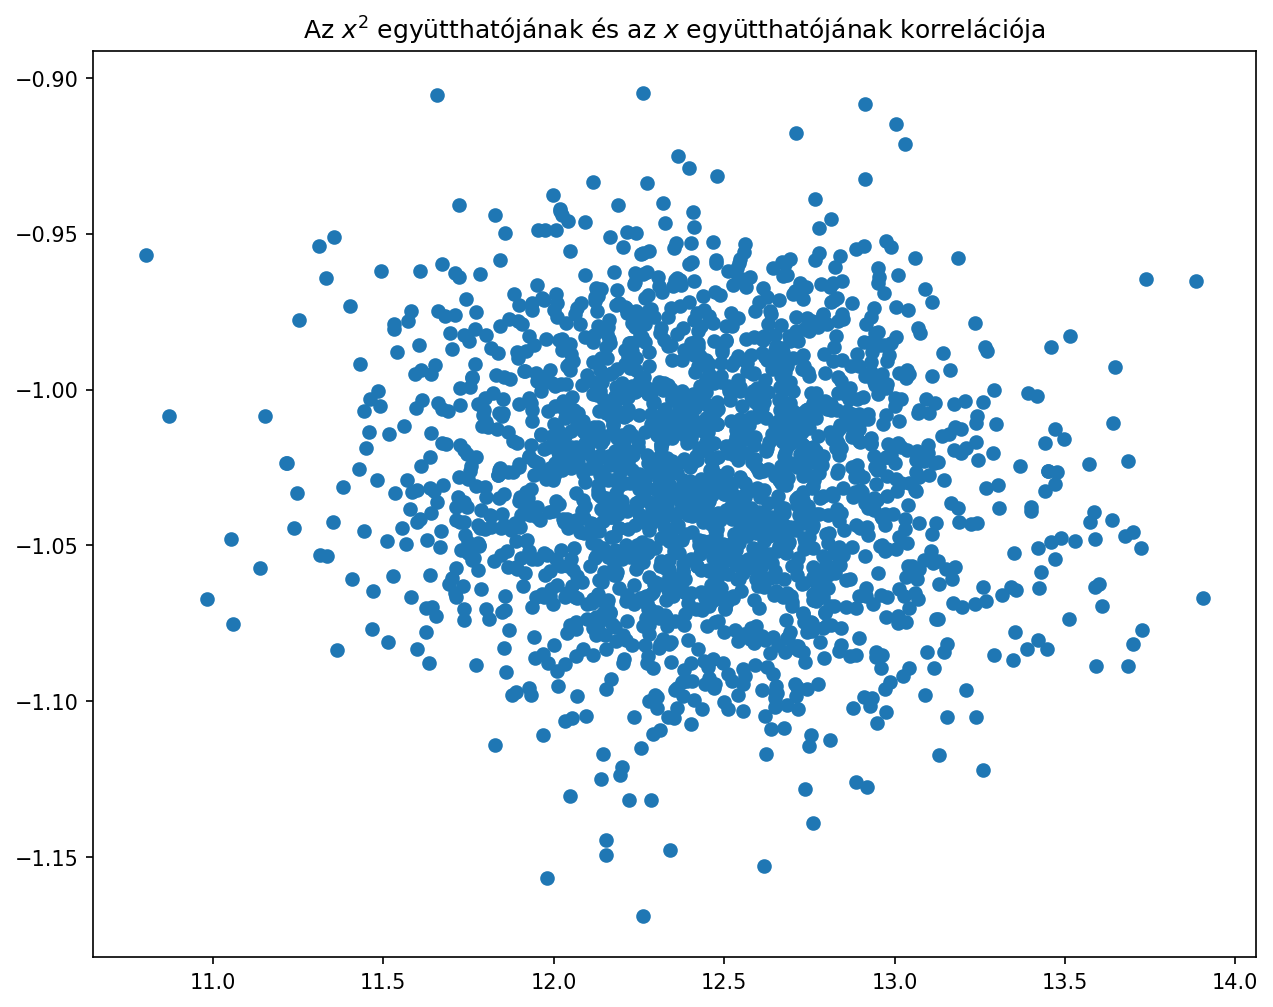

In [58]:
plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(Megoldasparameterek2, Megoldasparameterek1)
plt.title('Az $x^2$ együtthatójának és az $x$ együtthatójának korrelációja')

plt.show()

## Teljes 4. feladatrész

A redukált $\chi^2$ érték segítségével próbáljuk eldönteni, hogy az adataink hanyadfokú polinomot követnek valójában! Számítsuk ki $n=1\ldots7$ közötti fokszámú polinom illesztésére a redukált $\chi^2$ értékeket és ábrázoljuk őket  $n$ függvényében! Próbáljuk ennek segítségével leolvasni a tényleges fokszámot!

Idemásolva az adatsort generáló utasítást, azt is próbáljuk ki, milyen gyakran következtetnénk $n=2$-re!


In [59]:
x, y, sigma = random_data(101)

<ErrorbarContainer object of 3 artists>

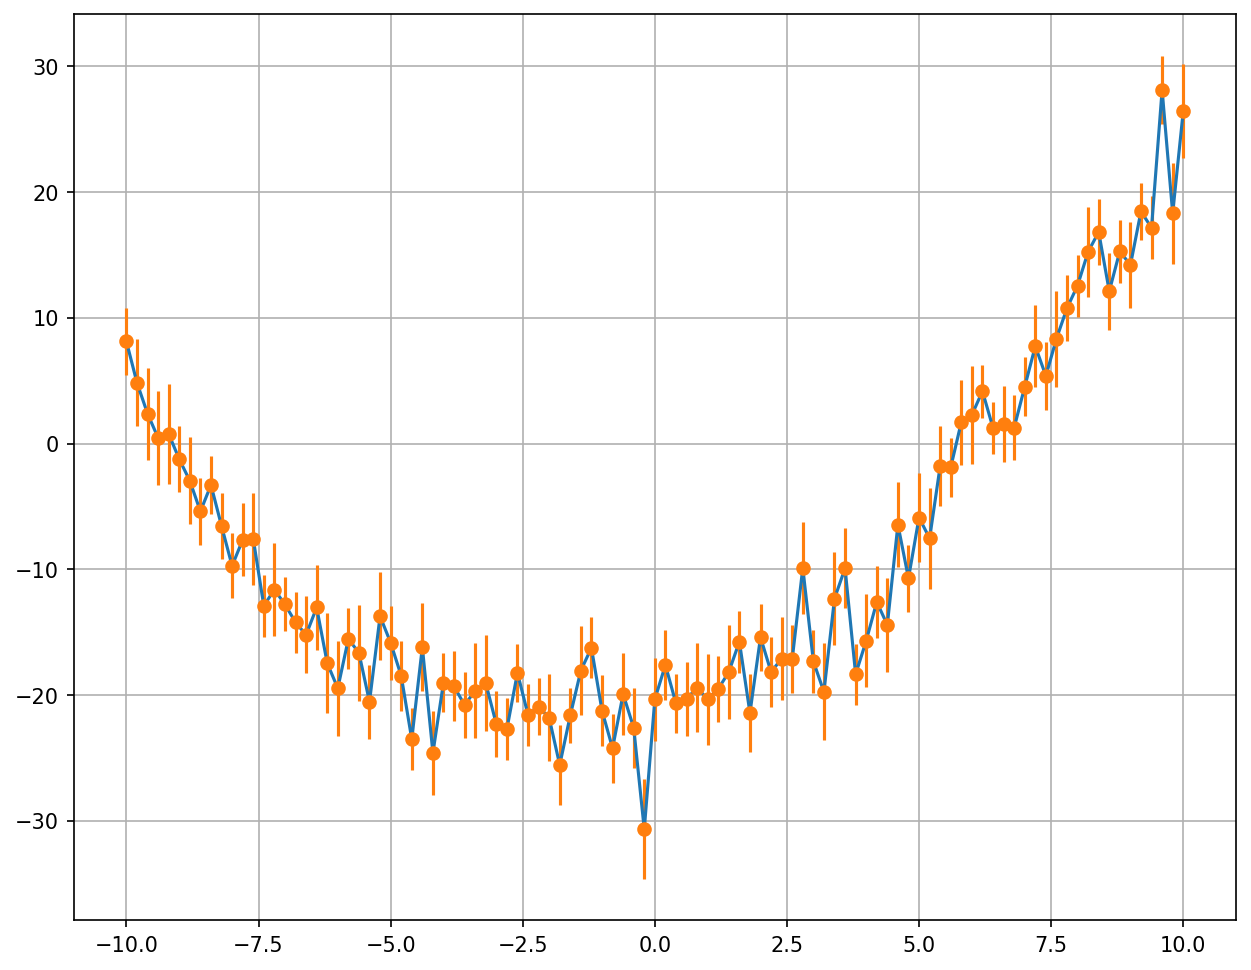

In [60]:
# ábra a mérési pontokkal és hibaintervallumokkal
plt.figure(figsize=(10, 8), dpi=150)

plt.grid()
plt.plot(x, y)

xertek = np.linspace(-10, 10, 1000)

#plt.plot(xertek, 0.23868458*xertek**2+1.60979466*xertek+-14.74841532)

plt.errorbar(x,y,sigma,marker='o',linestyle='')

In [61]:
vektorosillesztes(2)

array([  0.36208239,   1.12673566, -21.30583553])

A lentebbi függvény az, ami jól számolja a redukalt xinegyzet erteket.

In [62]:
def redukaltxinegyzetszamlalo(k):
    
    
    hatvanyok = np.linspace(k, 0, k+1)
    
    xreshape = x.reshape(-1,1)  #Az x listát egy 1x1es formába rendezem.
    
    sigmareshape = sigma.reshape(-1,1) #A hibákat egy 1x1es formába rendezem
    
    X = np.power(xreshape, hatvanyok)
    
    X = X/sigmareshape
    
    K = X.T@X
    L = X.T@(y/sigma)
    
    a = solve(K, L)
    
    eredmeny = X@a
    
    xinegyzet = []
    
    for i in range(len(eredmeny)):
        
        xinegyzet.append((eredmeny[i]-y[i]/sigma[i])**2)
        
        
        
        
    
    return (sum(xinegyzet)/(len(x)-k))
#-k-1-et kéne kivonni
    
    

In [63]:
xinegyzeterteke = []

fokszam = []
for i in range(1,8):
    
    fokszam.append(i)
    
    xinegyzeterteke.append(redukaltxinegyzetszamlalo(i))
    
    

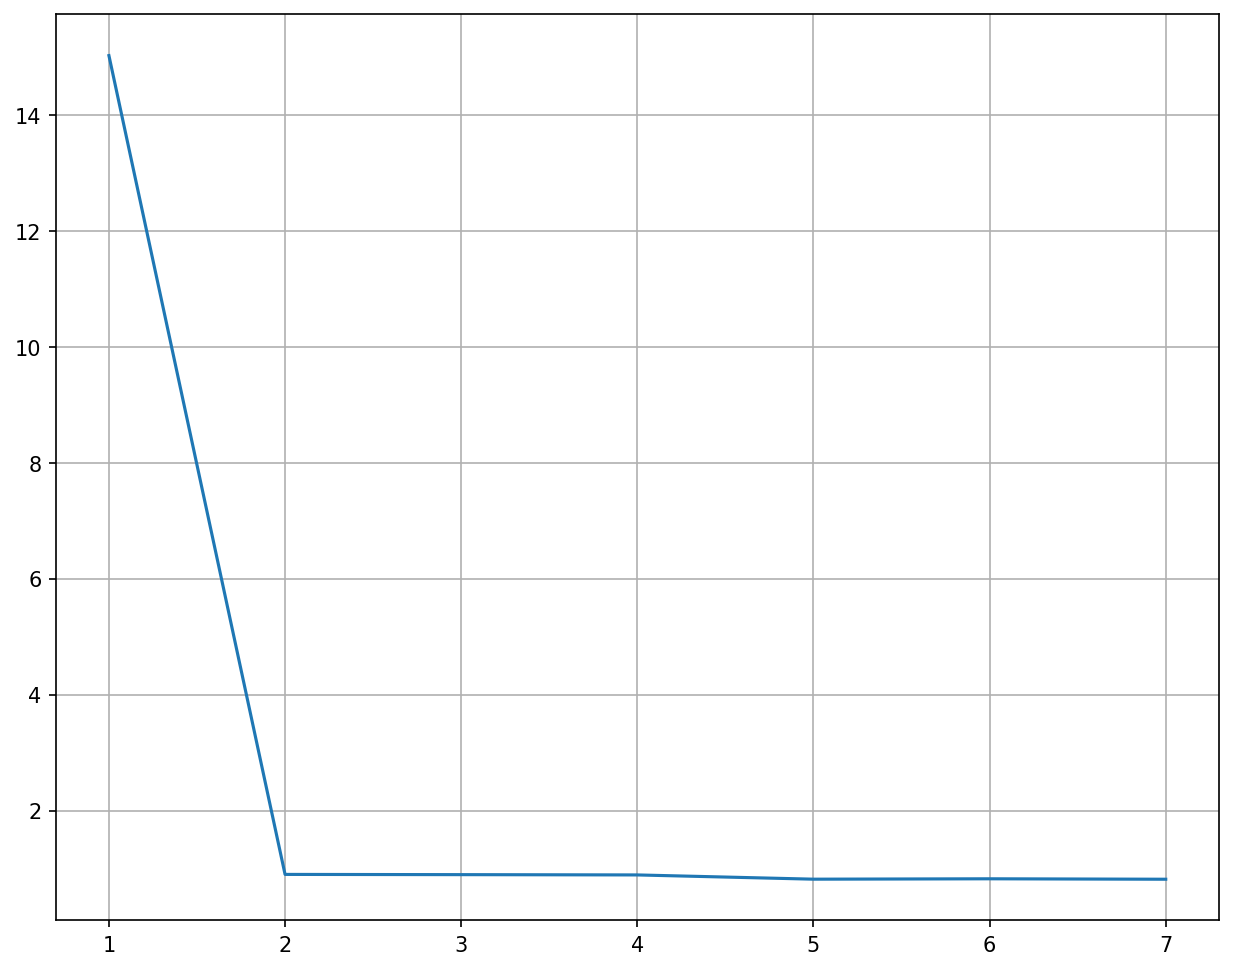

In [64]:


plt.figure(figsize=(10, 8), dpi=150)

plt.plot(fokszam, xinegyzeterteke)

plt.grid()

In [65]:
print("A legjobb illesztés", xinegyzeterteke.index(min(xinegyzeterteke))+1, "-odfokú polinomnál adódott.")

A legjobb illesztés 7 -odfokú polinomnál adódott.


In [66]:
redukaltxinegyzetszamlalo(2)

0.898985460373441

In [67]:
def chinegyzetszamlalopolival(n):
    
    a = vektorosillesztes(n)
    
    eredmeny = np.polyval(a, x)
    
    return eredmeny

In [68]:
chinegyzetszamlalopolival(2)     #Az illesztett polinomom értéke


array([  3.63504678,   2.42654765,   1.24701512,   0.09644917,
        -1.02515019,  -2.11778295,  -3.18144912,  -4.21614871,
        -5.2218817 ,  -6.1986481 ,  -7.14644791,  -8.06528112,
        -8.95514775,  -9.81604779, -10.64798123, -11.45094808,
       -12.22494835, -12.96998202, -13.6860491 , -14.37314959,
       -15.03128348, -15.66045079, -16.2606515 , -16.83188563,
       -17.37415316, -17.8874541 , -18.37178845, -18.82715621,
       -19.25355738, -19.65099196, -20.01945994, -20.35896134,
       -20.66949614, -20.95106436, -21.20366598, -21.42730101,
       -21.62196945, -21.78767129, -21.92440655, -22.03217522,
       -22.11097729, -22.16081278, -22.18168167, -22.17358397,
       -22.13651968, -22.0704888 , -21.97549133, -21.85152726,
       -21.69859661, -21.51669936, -21.30583553, -21.0660051 ,
       -20.79720808, -20.49944447, -20.17271427, -19.81701747,
       -19.43235409, -19.01872412, -18.57612755, -18.10456439,
       -17.60403464, -17.07453831, -16.51607537, -15.92

In [69]:
#A redukalt xinégyzet értékét számoló függvény

def redukaltxinegyzetszamlalo2(n):                
    
    illesztettertek = chinegyzetszamlalopolival(n) 
    
    osszeg = 0
    for i in range(len(x)):
        
        ertek = (illesztettertek[i]-y[i])**2/(sigma[i]**2)
        
        osszeg += ertek
        
    redukaltxinegyzet = osszeg/(len(x)-n)

    return redukaltxinegyzet
        
        

In [70]:
redukaltxinegyzetszamlalo2(2)

0.898985460373441

In [71]:
xertek = []

redukaltxinegyzetertek = []

for i in range (0, 8):
    
    xertek.append(i)
    
    redukaltxinegyzetertek.append(redukaltxinegyzetszamlalo2(i))
    
    

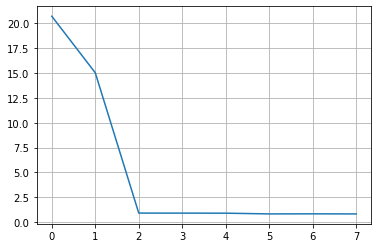

In [72]:
plt.plot(xertek, redukaltxinegyzetertek)

plt.grid()

In [73]:
# modell választás próba
# nézzük meg chi2r értékét n függvényében

print(min(redukaltxinegyzetertek))

fokszam = redukaltxinegyzetertek.index(min(redukaltxinegyzetertek))


print("A legjobb illesztés ", fokszam, "fokszám esetén valósul meg.")







0.8157400499319836
A legjobb illesztés  7 fokszám esetén valósul meg.


In [74]:
# Tapasztalatok:


#Az elsőfokú illesztése a redukált chi^2 nagyon nagy értéket vesz fel. Ezek után a másodfokú polinom már nagyon kis 
#reduklatchi^2 értéket vesz fel. 

#A legjobban illeszkedő polinom fokszámát a fenti cella írja ki.


## <font color='green5'>5. Szorgalmi feladatrész</font>
Alkalmazzuk a "Modell választás" anyagrészben leírt módszert!
Az adathalmazból minden második pontot a traning halmazba, a maradékot a validációs halmazba téve számoljuk ki az $n$-edfokú polinom illesztési együtthatókat a training halmazon, majd a kiszámolt illesztési együtthatókkal határozzuk meg a validációs halmazra vonatkozó $\chi^2$ értéket. Ne normáljunk a redukált $\chi^2$ értékhez hasonlóan! Ábrázoljuk ezt is $n$ függvényében, és próbáljuk megállapítani a valódi fokszámot! Könnyebben tudunk-e következtetni a fokszámra, mint a 4-es feladatrész esetén?

Idemásolva az adatsort generáló utasítást, azt is próbáljuk ki, milyen gyakran lesz a minimum az $n=2$ közelében!

In [75]:
# a training és validációs halmaz létrehozása és számolások

validacioshalmaz = x[::2]

validaciosy = y[::2]

validaciossigma = sigma[::2]

traininghalmaz = []
trainingy = []

trainingsigma = []

for i in x:
    if i not in validacioshalmaz:
        
        traininghalmaz.append(i)
for i in y:
    if i not in validaciosy:
        trainingy.append(i)
        
for i in sigma:
    if i not in validaciossigma:
        trainingsigma.append(i)

In [76]:
#trainingsigma

In [77]:
def fittelo( n):
    
    b=matrix(zeros((len(x),1)))
    
    
        
        
    
    X=matrix(zeros((len(x),n+1)))
    
    #print(X)
    
    
    
    for i in range(0, len(x)):
        for k in range(0, n+1):
        
        
            X[i,k]=(x[i]**(n-k))/sigma[i]
            
            #print(n-k)
            
            
            b[i, 0]=y[i]/sigma[i]
    
    #print(X)
            
    K = X.T*X
    
    L = X.T*b
    
    #Az egyenletrendszer most Kx=L alakban áll elő
    
    #print(numpy.shape(K))
    
    #print(numpy.shape(L))
    
    #print(X, X.T)
    
    a = solve(K,L)
        
    a = np.concatenate(matrix.tolist(a))
    
    A = a.tolist()
    
    return A

In [78]:
A =fittelo(2)

In [79]:
A

[0.362082389266028, 1.1267356618028104, -21.305835525346193]

In [80]:
illesztes = []

illesztes2 = []

for i in range(len(traininghalmaz)):
    
    illesztes.append(A[0]*traininghalmaz[i]**2+A[1]*traininghalmaz[i]+A[2])
    
for i in range(len(validacioshalmaz)):
    
    illesztes2.append(A[0]*validacioshalmaz[i]**2+A[1]*validacioshalmaz[i]+A[2])

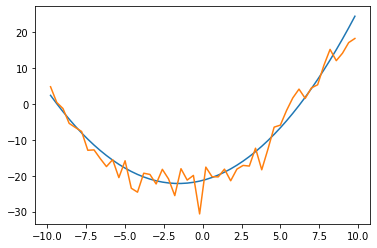

In [81]:
plt.plot(traininghalmaz, illesztes)
plt.plot(traininghalmaz, trainingy)


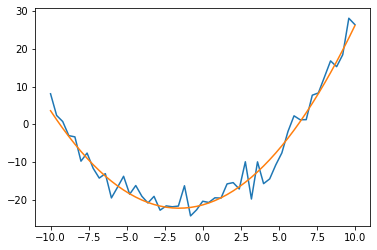

In [82]:
plt.plot(validacioshalmaz, validaciosy)
plt.plot(validacioshalmaz, illesztes2)

In [83]:
A

[0.362082389266028, 1.1267356618028104, -21.305835525346193]

In [84]:
#A validacios halmazra szamolt chi^2 értékek:

def xinegyzetszamlalo( n):
    
    xinegyzet = [];
    
    illesztettertek = []
        
    #for k in range(len(A)):
    
    A = fittelo(n)
    for i in range(len(validacioshalmaz)):
        
        
        
        osszeg = 0;
        
        for k in range (len(A)-1, -1, -1):
        
            
            
            osszeg += A[len(A)-1-k]*validacioshalmaz[len(A)-k]**k;                       #A polinomfuggveny erteket hozzaadom az
            
            #osszeg valtozohoz
            
        illesztettertek.append(osszeg)
            
    
    
    
        xinegyzet.append((validacioshalmaz[i]-illesztettertek[i])**2/(validaciossigma[i])**2)
        
        
    
    
    return sum(xinegyzet)
    
    
    
    
    
    
    
    
    

    

In [85]:
xinegyzetszamlalo(2)

220.27241327089735

In [86]:
sorszam = []
xinegyzetertek = [ ]

In [87]:
for i in range (2, 8):
    sorszam.append(i)
    xinegyzetertek.append(xinegyzetszamlalo(i))

In [88]:
print(sorszam)

print(xinegyzetertek)

[2, 3, 4, 5, 6, 7]
[220.27241327089735, 208.53275713737895, 217.68509287546098, 217.80196042464254, 298.00164675332644, 1383.6038540856994]


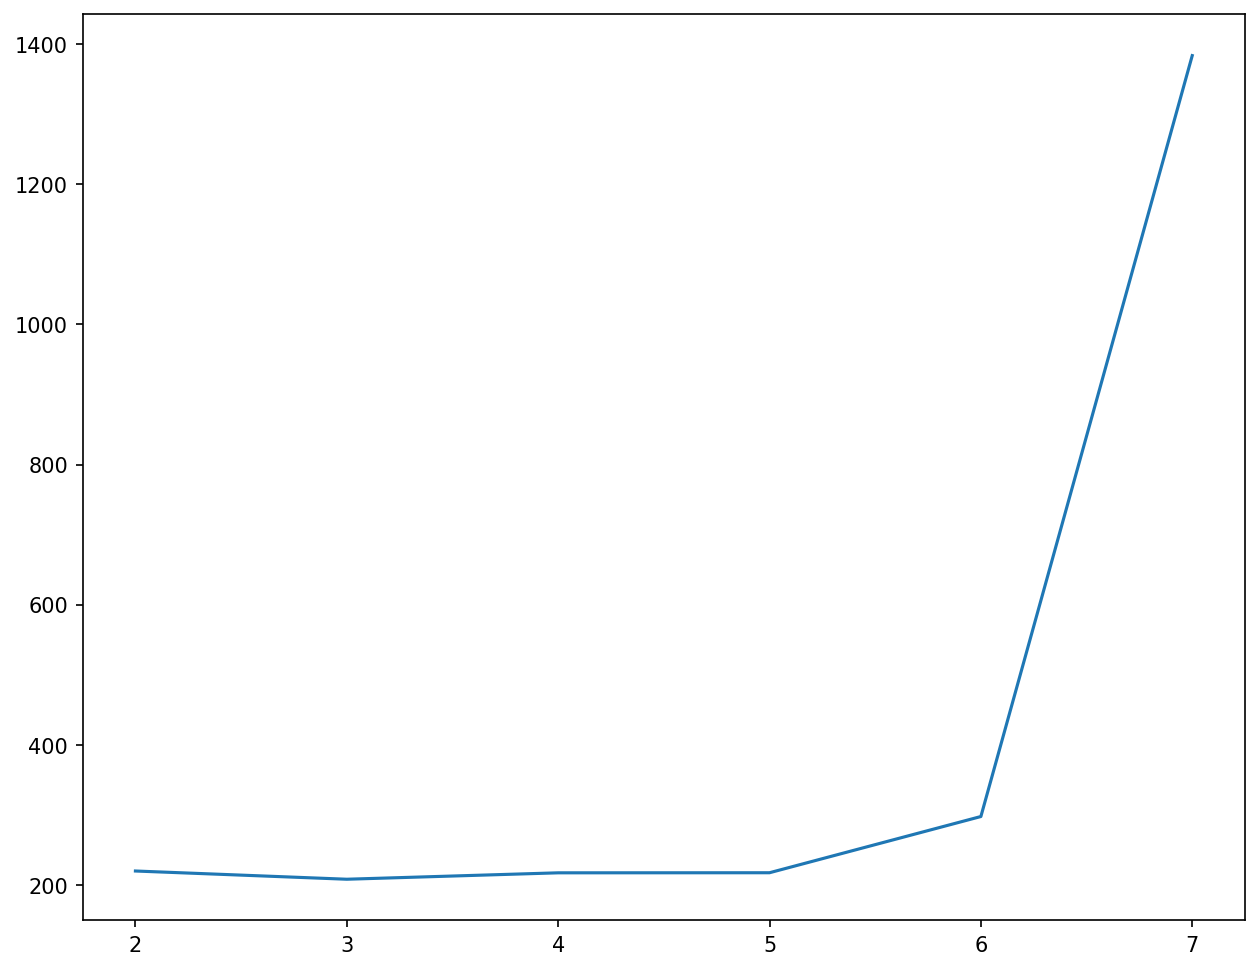

In [89]:
plt.figure(figsize=(10, 8), dpi=150)

plt.plot(sorszam, xinegyzetertek)

In [90]:
print("A fokszám függvényében ábrázolva xinégyzetet a minimum", sorszam[xinegyzetertek.index(min(xinegyzetertek))], "-edfokú polinom illesztésénél adódott")

A fokszám függvényében ábrázolva xinégyzetet a minimum 3 -edfokú polinom illesztésénél adódott


In [91]:
Minimumok = []
for k in range(400):
    
    x, y, sigma = random_data(101)
    
    #plt.plot(x,y)

    sorszam =[]
    xinegyzetertek = []
    
    for i in range (2, 8):

        
        sorszam.append(i)
        xinegyzetertek.append(xinegyzetszamlalo(i))
        

    
    Minimumok.append(sorszam[xinegyzetertek.index(min(xinegyzetertek))])



In [92]:
from collections import Counter
data = Counter(Minimumok)
data.most_common()   # Returns all unique items and their counts
#data.most_common(1)  # Returns the highest occurring item

[(7, 148), (2, 92), (6, 75), (5, 32), (3, 27), (4, 26)]

In [93]:
# Tapasztalatok:

print('A legjobb illesztés 7-edfokú polinommal adódik, a kis fokszámok közül a másodfokú függvény illeszkedik a legjobban.')

A legjobb illesztés 7-edfokú polinommal adódik, a kis fokszámok közül a másodfokú függvény illeszkedik a legjobban.


## <font color='green5'>6. Szorgalmi feladatrész</font>

A 3-ik feladatrészben kaptunk egy eloszlást a paraméter vektorra a szintetikus adatsorok segítségével. Az eloszlás elemei szintetikus adatsorokra való illesztéssel kapott $\mathbf{a}_{(i)}^{(S)}$ paraméter vektorok. Ezek segítségével

a) Határozzuk meg a 95\%-os konfidencia intervallumokat az eredeti adatsorra való illesztésből kapott $\mathbf{a}_{(0)}$ paraméterekre. Tehát keressük meg minden $k$-ra azt az intervallumot, amelyre igaz, hogy a pontok 2.5\%-a van rajta kívül pozitív és negatív irányba egyaránt!
Ezzel tudjuk becsülni az $a_{(0)k}$ érték alapján a minket érdeklő valódi $a_{{\rm (true)}k}$ értéket.

b) Határozzunk meg a 95%-os konfidencia-tartományt a 3 dimenziós paramétertérben! Ezt a tartományt most az eredeti adatsorral generált $\chi^2$ függvény segítségével határozzuk meg. Keressük meg tehát azt a $\chi^2$ határértéket, melyre igaz, hogy az $\mathbf{a}_{(i)}^{(S)}$ paraméter vektorok 95%-ához tartozik ennél kisebb $\chi^2$ érték! Ez azt jelenti, hogy minden $\mathbf{a}_i^{(S)}$-hez kiszámoljuk a $\chi^2$ értéket, ezeket sorrendezve leolvashatjuk a határértéket. Utána ábrázoljuk a paramétervektorokat az $a_k,a_l$ vetületekben úgy, hogy a hatérték alatti és feletti $\chi^2$-tel rendelkezők eltérő színűek legyenek. Határozzuk meg azt is, hogy az $a_k$ értékek milyen intervallumába esnek a belső pontok, majd hasonlítsuk össze az így kapott intervallumokat az a)-beliekkel.

In [98]:
# konfidencia intervallum számolás

len(Megoldasparameterek0)

rendezettlista = sorted(Megoldasparameterek0)



In [102]:
rendezettlista[-1]

-0.21570475981683088

In [100]:
import scipy.stats as st

In [110]:
konfidenciaintervallum = st.t.interval(alpha=0.95, df=len(rendezettlista)-1, loc=np.mean(rendezettlista), 
                                       scale=st.sem(rendezettlista))

print('Az x^2 együtthatókra a  95%-os konfidenciaintervallum:', konfidenciaintervallum)

Az x^2 együtthatókra a  95%-os konfidenciaintervallum: (-0.2479747429196703, -0.247259514450481)


In [106]:
rendezettlista2 = sorted(Megoldasparameterek1)

In [109]:
konfidenciaintervallum2 = st.t.interval(alpha=0.95, df=len(rendezettlista2)-1, 
                                        loc=np.mean(rendezettlista2), scale=st.sem(rendezettlista2))

print('Az x együtthatókra a  95%-os konfidenciaintervallum:', konfidenciaintervallum2)

Az x együtthatókra a  95%-os konfidenciaintervallum: (-1.0296710619539196, -1.0263156983082273)


In [111]:
rendezettlista3 = sorted(Megoldasparameterek2)

In [124]:
rendezettlista3

[10.804418095135999,
 10.871200074441468,
 10.983019427732465,
 11.051716509030253,
 11.058959595027625,
 11.137023902386415,
 11.153844522841018,
 11.213398436038787,
 11.215852010758462,
 11.237891918672851,
 11.248076271393671,
 11.253939297590476,
 11.312571998594846,
 11.313405126408302,
 11.333178289146758,
 11.333271258589638,
 11.352712408822297,
 11.355140066239196,
 11.364745979359563,
 11.381968271094038,
 11.40175143960373,
 11.40896698751995,
 11.429027304876747,
 11.432648002164816,
 11.441925193148242,
 11.443735845709561,
 11.447790646384204,
 11.458641186938156,
 11.460068260657787,
 11.465681782897493,
 11.469610487594842,
 11.481450589936847,
 11.484313099248766,
 11.488954478919647,
 11.491869858011821,
 11.5119106021248,
 11.51490464183211,
 11.516556499673323,
 11.528309982216921,
 11.532144070367709,
 11.532395777436223,
 11.535573815257228,
 11.538782974413067,
 11.553743032670093,
 11.561460086224315,
 11.56671114603452,
 11.570601488853928,
 11.571053040779404

In [123]:
konfidenciaintervallum3 = st.t.interval(alpha=0.95, df=len(rendezettlista3)-1, 
                                        loc=np.mean(rendezettlista3), scale=st.sem(rendezettlista3))

print('Az konstans együtthatókra a  95%-os konfidenciaintervallum:', konfidenciaintervallum3)

Az konstans együtthatókra a  95%-os konfidenciaintervallum: (12.409415759863363, 12.44807180981787)


In [143]:
# konfidencia tartomány számolás

def konfidenciaxinegyzetszamlalo(k):
    
    
    hatvanyok = np.linspace(k, 0, k+1)
    
    xreshape = x.reshape(-1,1)  #Az x listát egy 1x1es formába rendezem.
    
    sigmareshape = sigma.reshape(-1,1) #A hibákat egy 1x1es formába rendezem
    
    X = np.power(xreshape, hatvanyok)
    
    X = X/sigmareshape
    
    K = X.T@X
    L = X.T@(y/sigma)
    
    a = solve(K, L)
    
    #print((a))
    
    eredmeny = X@a
    
    xinegyzet = []
    
    for i in range(len(eredmeny)):
        
        xinegyzet.append((eredmeny[i]-y[i]/sigma[i])**2)
        
    
        
        
        
        
    
    return (sum(xinegyzet))

In [144]:
xinegyzet = konfidenciaxinegyzetszamlalo(2)

In [145]:
rendezettxinegyzet = sorted(xinegyzet)

TypeError: 'numpy.float64' object is not iterable

In [146]:
konfidenciatartomany = st.t.interval(alpha=0.95, df=len(rendezettxinegyzet)-1, 
                                        loc=np.mean(rendezettxinegyzet), scale=st.sem(rendezettxinegyzet))

print('A vektorokra számol chi^2-re a  95%-os konfidenciaintervallum:', konfidenciatartomany)

A vektorokra számol chi^2-re a  95%-os konfidenciaintervallum: (0.6067425103685021, 1.06046974600039)


## <font color='green5'>7. Szorgalmi feladatrész</font>

A fiznum2.public direktoriban található **small.dat** fájl olyan adatokat tartalmaz, ahol öt független változó és egy skalár mért érték között van összefüggés. Írjunk függvényt, mely többváltozós polinomokat illeszt az adatokra a lineáris $\chi^2$ módszer segítségével.
A többváltozós polinomok olyan összeg alakban felírt formulák, ahol az összeg minden tagja a változók egész kitevőjű hatványainak szorzata. Egy tag fokszáma a benne szereplő hatványkitevők összege. A többváltozós polinom fokszáma pedig a legnagyobb fokszámú tagjának fokszáma. Például a
$$ p(x, y, z) = 3 + 5 x^2 + 4 x y z + 6 y z^3 $$
háromváltozós, negyedfokú polinom, mely vegyes tagokat is tartalmaz.

Az illesztést kétféleképp próbálhatjuk megírni:

a) Feltételezzük, hogy a függvény a független változók külön-külön függvényeinek összegeként közelíthető, ezért kihagyjuk a vegyes tagokat.

b) Figyelembe vesszük a vegyes tagokat is, így viszont a fokszám növekedtével gyorsan nő a polinom tagjainak száma.

Próbáljuk meg a 2-od és a 3-adfokú illesztést! Utána határozzuk meg az illesztési paraméterek hibáit!
Grafikus ellenőrzésképpen ábrázoljuk a függő változó mért értékei függvényében az illesztett értékeket!
Vegyük észre, hogy széles sávban beszínezett képet kapunk, és nem látszik, hogy azon belül hogyan változik a pontok sűrűsége! Ezen pl. úgy tudunk javítani, hogy csak minden m-dik pontot ábrázoljuk, megfelelő $m$ bejátszásával!
Először saját kis próbafájllal teszteljük a függvényeinket, azután használjuk a következő adatfájlokat:

A **small.dat** fájlt  ne másoljuk át a saját kooplexes mappába, hanem olvassuk közvetlenül a megfelelő
elérési útat megadva, pl. np.loadtxt("/v/courses/fiznum2.public/small.dat") !

A fájlok oszlopai:

* 1-5: független változó komponensei
* 6: függő változó (mért érték)
* 7: mérési hiba

In [97]:
# többváltozós illesztés
